# **# Importing Python Libraries**

In [ ]:
#Importing Packages/Libraries
##from google.colab import files
from sklearn import svm
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import matplotlib.pylab as pylab
import warnings
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing Dataset and Performing Descriptive Statistics**


In [ ]:
#Importing Train dataset into Colab
Train = pd.read_csv("/content/employee_attrition_train.csv")

Test= pd.read_csv("/content/employee_attrition_test.csv")

In [ ]:
#For setting the charts size globally
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.title_fontsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
#First few rows of the dataframe
Train.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2        Medical              1             997   
1               6.0          2        Medical              1             178   
2               7.0          1      Marketing              1            1780   
3               NaN          3        Medical              1             644   
4               7.0          4  Life Sciences              1            1118   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         3            80                 1   
1  ...                         4            80                 2   
2  ...                         2            80                 0   
3  ...                         3            80                 1   
4  ...                         4            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 32                      1               2               5   
1                  7                      0               3               3   
2                  1                      3               3               1   
3                 32                      2               3              32   
4                 18                      4               3               8   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        1                     3  
1                  2                        0                     1  
2                  0                        1                     0  
3                  5                       10                     7  
4                  6                        4                     0  

[5 rows x 35 columns]

In [ ]:
#Last few rows of the dataframe
Train.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1024   NaN        No      Travel_Rarely      750.0  Research & Development   
1025  41.0        No      Travel_Rarely      447.0  Research & Development   
1026  22.0       Yes  Travel_Frequently     1256.0  Research & Development   
1027  29.0        No      Travel_Rarely     1378.0  Research & Development   
1028  50.0        No      Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1024              28.0          3  Life Sciences              1   
1025               NaN          3  Life Sciences              1   
1026               NaN          4  Life Sciences              1   
1027              13.0          2          Other              1   
1028               9.0          3      Marketing              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1024            1596  ...                         4            80   
1025            1814  ...                         1            80   
1026            1203  ...                         2            80   
1027            2053  ...                         1            80   
1028            1591  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1024                 2                 10                      3   
1025                 0                 11                      3   
1026                 1                  1                      5   
1027                 1                 10                      2   
1028                 1                 27                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1024               2              10                  9   
1025               1               3                  2   
1026               3               0                  0   
1027               3               4                  3   
1028               3               1                  0   

      YearsSinceLastPromotion  YearsWithCurrManager  
1024                        6                     8  
1025                        1                     2  
1026                        0                     0  
1027                        0                     3  
1028                        0                     0  

[5 rows x 35 columns]

In [ ]:
#checking the shape of the dataset
row, col = Train.shape
print('There are total of {}'.format(row),'rows and {}'.format(col),'columns in the dataset')

There are total of 1029 rows and 35 columns in the dataset


In [ ]:
#checking column names of the dataframe
Train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Mean and Median are almost same
Train.describe(include = 'all').T

count unique                     top  freq  \
Age                        893.0    NaN                     NaN   NaN   
Attrition                   1029      2                      No   853   
BusinessTravel              1024      3           Travel_Rarely   723   
DailyRate                 1002.0    NaN                     NaN   NaN   
Department                  1029      3  Research & Development   676   
DistanceFromHome           934.0    NaN                     NaN   NaN   
Education                 1029.0    NaN                     NaN   NaN   
EducationField              1029      6           Life Sciences   426   
EmployeeCount             1029.0    NaN                     NaN   NaN   
EmployeeNumber            1029.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   1029.0    NaN                     NaN   NaN   
Gender                      1029      2                    Male   617   
HourlyRate                1029.0    NaN                     NaN   NaN   
JobInvolvement            1029.0    NaN                     NaN   NaN   
JobLevel                  1029.0    NaN                     NaN   NaN   
JobRole                     1029      9         Sales Executive   217   
JobSatisfaction           1029.0    NaN                     NaN   NaN   
MaritalStatus               1024      3                 Married   474   
MonthlyIncome             1029.0    NaN                     NaN   NaN   
MonthlyRate               1029.0    NaN                     NaN   NaN   
NumCompaniesWorked        1029.0    NaN                     NaN   NaN   
Over18                      1029      1                       Y  1029   
OverTime                    1029      2                      No   731   
PercentSalaryHike         1029.0    NaN                     NaN   NaN   
PerformanceRating         1029.0    NaN                     NaN   NaN   
RelationshipSatisfaction  1029.0    NaN                     NaN   NaN   
StandardHours             1029.0    NaN                     NaN   NaN   
StockOptionLevel          1029.0    NaN                     NaN   NaN   
TotalWorkingYears         1029.0    NaN                     NaN   NaN   
TrainingTimesLastYear     1029.0    NaN                     NaN   NaN   
WorkLifeBalance           1029.0    NaN                     NaN   NaN   
YearsAtCompany            1029.0    NaN                     NaN   NaN   
YearsInCurrentRole        1029.0    NaN                     NaN   NaN   
YearsSinceLastPromotion   1029.0    NaN                     NaN   NaN   
YearsWithCurrManager      1029.0    NaN                     NaN   NaN   

                                  mean          std     min     25%      50%  \
Age                          37.930571     9.395978    18.0    31.0     37.0   
Attrition                          NaN          NaN     NaN     NaN      NaN   
BusinessTravel                     NaN          NaN     NaN     NaN      NaN   
DailyRate                   800.528942   408.109828   102.0  458.25    801.5   
Department                         NaN          NaN     NaN     NaN      NaN   
DistanceFromHome              9.930407     8.421791     1.0     2.0      8.0   
Education                     2.892128     1.053541     1.0     2.0      3.0   
EducationField                     NaN          NaN     NaN     NaN      NaN   
EmployeeCount                      1.0          0.0     1.0     1.0      1.0   
EmployeeNumber             1024.367347   606.301635     1.0   496.0   1019.0   
EnvironmentSatisfaction       2.683188     1.096829     1.0     2.0      3.0   
Gender                             NaN          NaN     NaN     NaN      NaN   
HourlyRate                   66.680272    20.474094    30.0    48.0     67.0   
JobInvolvement                2.713314     0.710146     1.0     2.0      3.0   
JobLevel                      2.043732     1.118918     1.0     1.0      2.0   
JobRole                            NaN          NaN     NaN     NaN      NaN   
JobSatisfaction               2.712342

**Observation:**
For continous variables 'unique' is updated as NaN, for categorical variables, the number of unique values are updated along with the most frequent value with the # of times. 
There is a possibility for outliers presence in monthly income and monthly rate fields. However, we need to confirm with the boxplots

# **Exploratory Data Analysis**

# **Univariate Analysis:**

Here we study the behaviour of each column, their distributions, detect outliers, missing values, skewness and plotting them

In [ ]:
#How many unique values are present in each column
features=Train.columns
print("Number of unique values are as below:\n")
for i in features:
  uniqueValues=Train[i].nunique()
  print(i,uniqueValues)

Number of unique values are as below:

Age 39
Attrition 2
BusinessTravel 3
DailyRate 692
Department 3
DistanceFromHome 27
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1029
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 963
MonthlyRate 1010
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 32
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 17


# ***Dropping variables***

In [ ]:
#dropping unuseful columns asit consists of unique values
Train.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True,axis=1)

In [ ]:
#To check the datatypes of the variables
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EnvironmentSatisfaction   1029 non-null   int64  
 9   Gender                    1029 non-null   object 
 10  HourlyRate                1029 non-null   int64  
 11  JobInvolvement            1029 non-null   int64  
 12  JobLevel                  1029 non-null   int64  
 13  JobRole                   1029 non-null   object 
 14  JobSatis

**Checking Null Values**

In [ ]:
#Checking Null values
data=round(Train.isnull().sum(),2)
data

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: i

In [ ]:
# percentage of null values in columns which have null values.
data=round((Train.isnull().sum()/Train.shape[0])*100,2)
nullValueCols=pd.DataFrame(data,columns=['Missing Value %'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Column Name'},inplace=True)
nullValueCols[nullValueCols['Missing Value %']!=0]

Column Name  Missing Value %
0                Age            13.22
2     BusinessTravel             0.49
3          DailyRate             2.62
5   DistanceFromHome             9.23
15     MaritalStatus             0.49

In [ ]:
#Filling Null Values


In [ ]:
# No duplicates.
Train.duplicated().sum()

0

**Observation:**

No Duplicates are found in the data

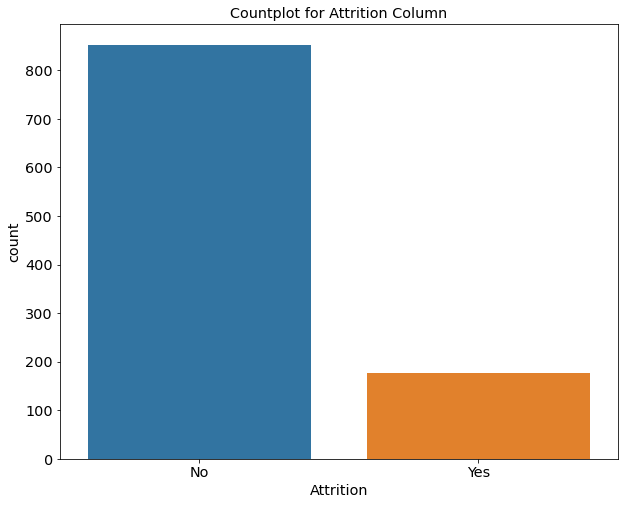

In [ ]:
#plotting target variable (Attrition)
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'Attrition', data = Train)
plt.title("Countplot for Attrition Column")
plt.show()

In [ ]:
# Attrition is the Y variable, relative frequencies of the dependent variable. Imbalance dataset.
Train.Attrition.value_counts(normalize = True)

No     0.82896
Yes    0.17104
Name: Attrition, dtype: float64

**Observation:**

Data dataset is highly Imbalanced wrt to Attrition column

In [ ]:
#Separating Numeric data and checking the column names
NumericData=Train.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 23
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#melting the dataframe to bring the data into single column for FacetGrid
NumericDataMelt=NumericData.melt()
NumericDataMelt.head()

variable  value
0      Age   50.0
1      Age   36.0
2      Age   21.0
3      Age   50.0
4      Age   52.0

**Observations:**

**Below variables though they are Numeric data type, but as per Business they are Categorical in nature.** 

Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, Stock OptionLevel, WorkLifeBalance, 

**Below variables are of Numeric Data type:**

Age, DailyRate, DistanceFromHome, HourlyRate, Montly Income, MonthlyRate, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear,NumberOfCompaniesWorked

**Skew Details:**

**Normally/Close to distributed: **Age, DailyRate, HourlyRate, MonthlyRate


**Right Skewed/Positive Skew:**DistanceFromHome, MonthlyIncome,PercentSalaryHike, YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

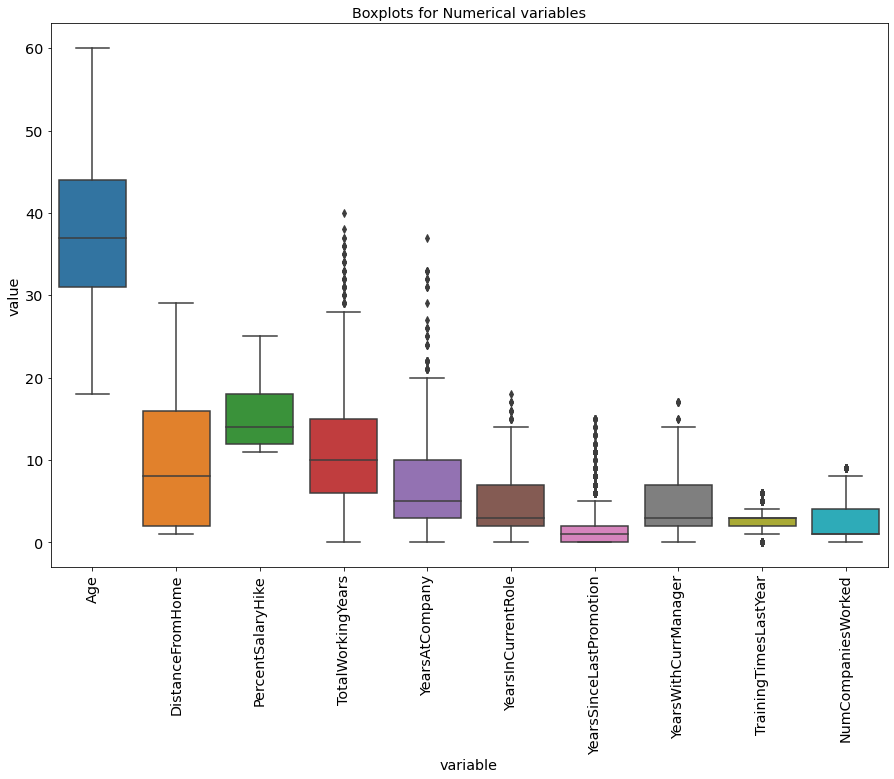

In [ ]:
NewNumeric=Train[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

We see there are outliers in below columns
1. TotalWorkingYears
2. YearsAtCompany
3. YearsInCurrentRole
4. YearsSinceLastPromotion
5. YearsWithCurrManager
6. TrainingTimesLastYear
7. NumCompaniesWorked

**Skew Details:**

**Normally/Close to distributed: **Age, DailyRate, HourlyRate, MonthlyRate


**Right Skewed/Positive Skew:**DistanceFromHome, MonthlyIncome,PercentSalaryHike, YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Columns which are skewed are not having uniform distribution of the data accross the quantiles

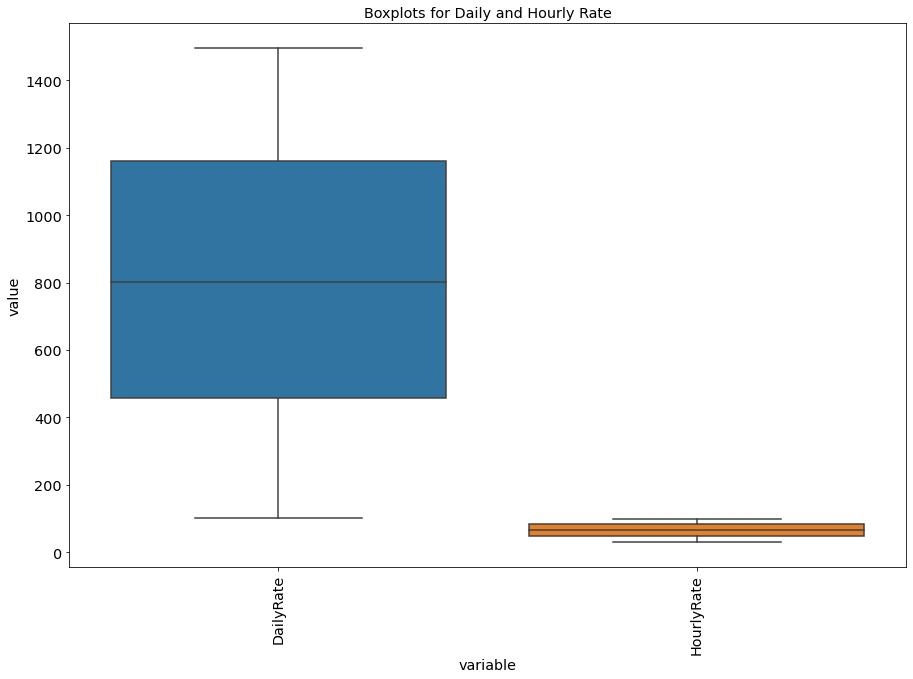

In [ ]:
#Boxplot for Daily and Hourly Rate
NewNumeric=Train[['DailyRate','HourlyRate']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Daily and Hourly Rate")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

There are no outliers in DailyRate and HourlyRate

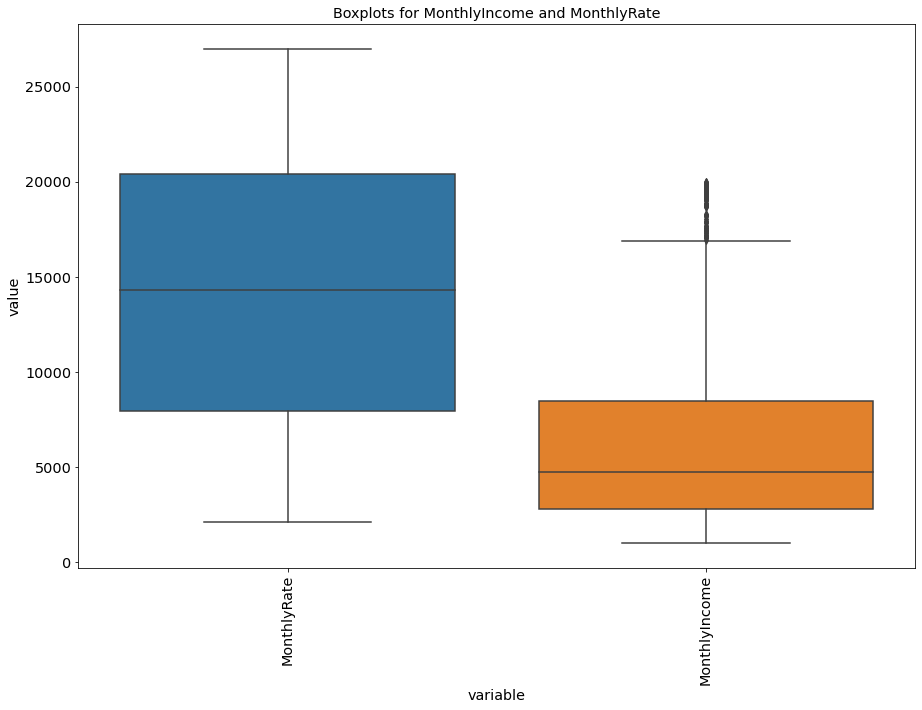

In [ ]:
#Boxplot for MonthlyIncome and MonthlyRate
NewNumeric=Train[['MonthlyRate','MonthlyIncome']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for MonthlyIncome and MonthlyRate")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

There are Outliers in MonthlyIncome


# **Overall Observations of Numeric Univariate Analysis:**

**Outliers columns are found:**

1. TotalWorkingYears
2. YearsAtCompany
3. YearsInCurrentRole
4. YearsSinceLastPromotion
5. YearsWithCurrManager
6. TrainingTimesLastYear
7. NumCompaniesWorked
8. MonthlyIncome

**Columns Dropped:**
1. EmployeeCount
2. EmployeeNumber
3. Over18
4. StandardHours

**Distributions of columns:**

**Normally distributed:** Age, DailyRate, HourlyRate, MonthlyRate,

**Right Skewed:**DistanceFromHome, MonthlyIncome,PercentSalaryHike, YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager


# **Numeric Bivariate Analysis**

In [ ]:
#Attrition vs Numeric Variables
#Creating variable for holding the Numeric data into a DataFrame
NumericVariables=Train[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                        'MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                        'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','NumCompaniesWorked',
                        'YearsSinceLastPromotion','YearsWithCurrManager']]

In [ ]:
#Creating NumericBV variable for concatinating with Attrition Column for Bivariate Analysis
NumericBV=NumericVariables
NumericBV['Attrition']=Train['Attrition']

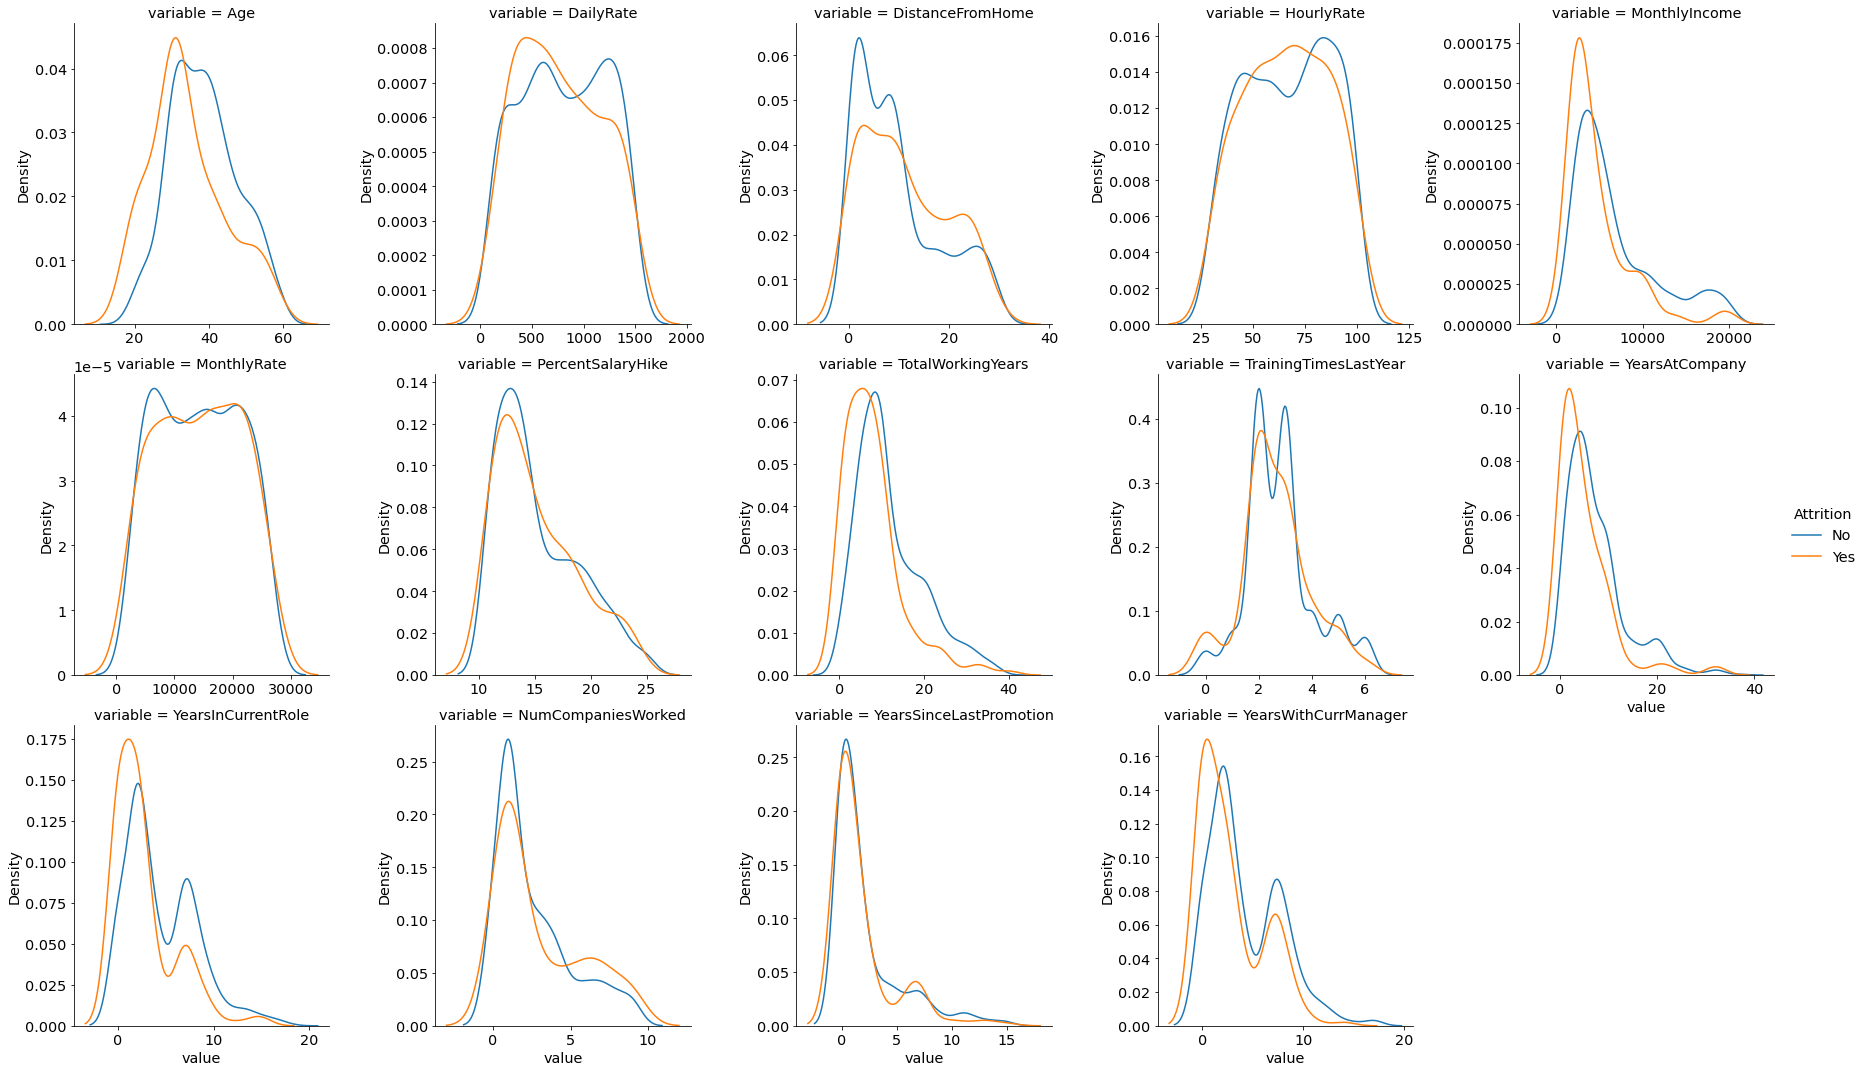

In [ ]:
#Bivariate Analysis for actual categorical Variables with Attrition
NumericBVData = NumericBV.melt(id_vars=['Attrition'])
NumericDataGD = sns.FacetGrid(NumericBVData, col='variable',sharex=False,sharey=False,dropna=True,size=5,col_wrap=5,  hue='Attrition' )
histPlot=NumericDataGD.map(sns.kdeplot,'value' )
NumericDataGD.add_legend()
plt.show()

**Observations:**

We notice below factors are are contributing to Attrition

1. Employees of Age below 30 (approx) 
2. Employees whose MonthlyIncome is less than 5000 (approx) 
3. Employees whose TotalWorkingYears below 10 years (approx) 
4. YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager below 5 years (approx) 

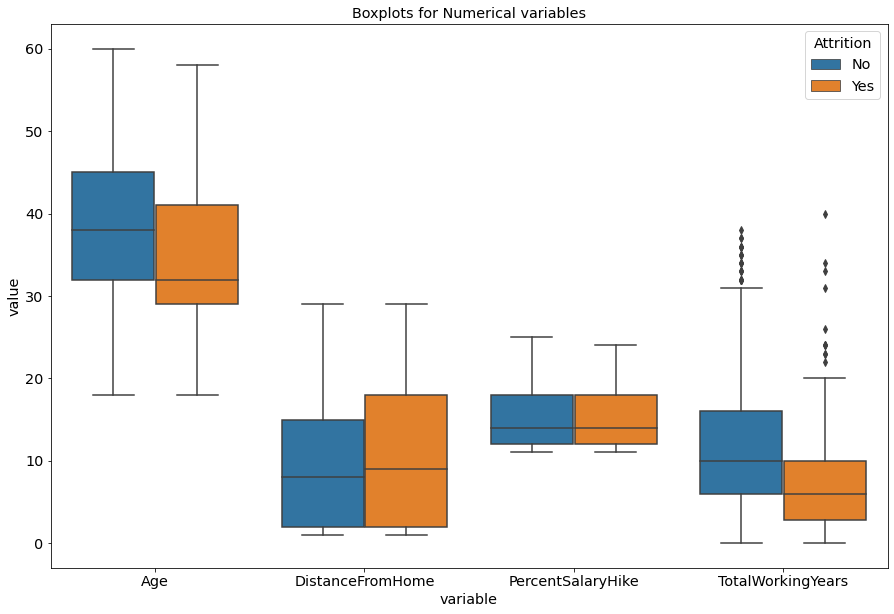

In [ ]:
NewNumeric=Train[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
plt.show()

**Observation:**

1. Percent SalaryHike and DistanceFromHome are not contributing to Attrition

2. Age below 30 and TotalWorkingYears below 5 are contributing to Attrition.

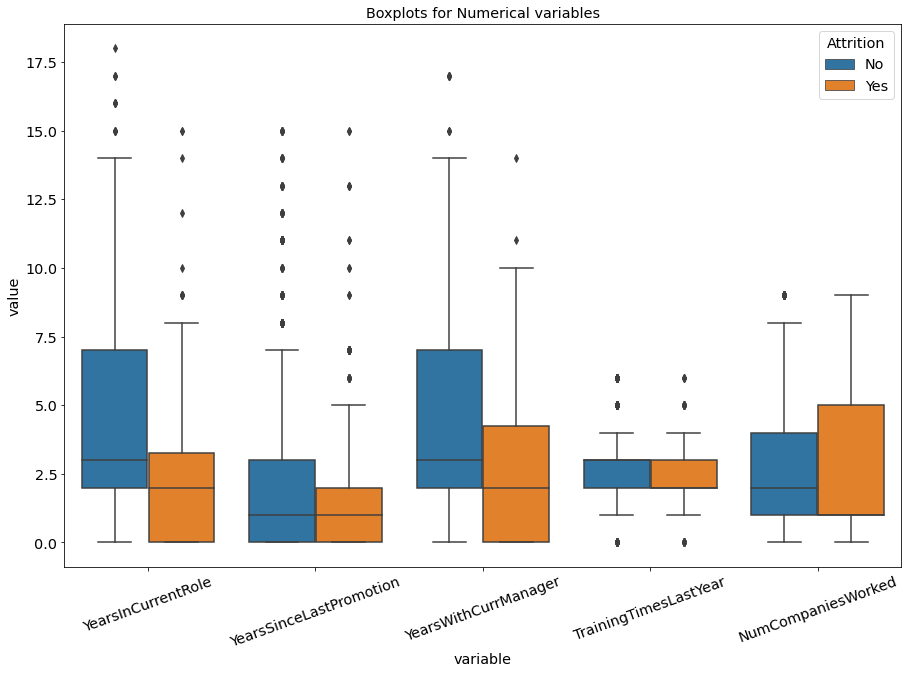

In [ ]:
NewNumeric=Train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
bp.set_xticklabels(bp.get_xticklabels(),rotation=20)
plt.show()

**Observations:**

1. YearsSinceLastPromotion and TrainingTimesLastYear are not contributing much to decide the Attrition rate
2. Those employees whose avg years with current manager and yearsInCurrentRole is below 3 years are contributing to Attrition.
3. Employees whose NumCompaniesWorked 1-4 years are contributing to attrition

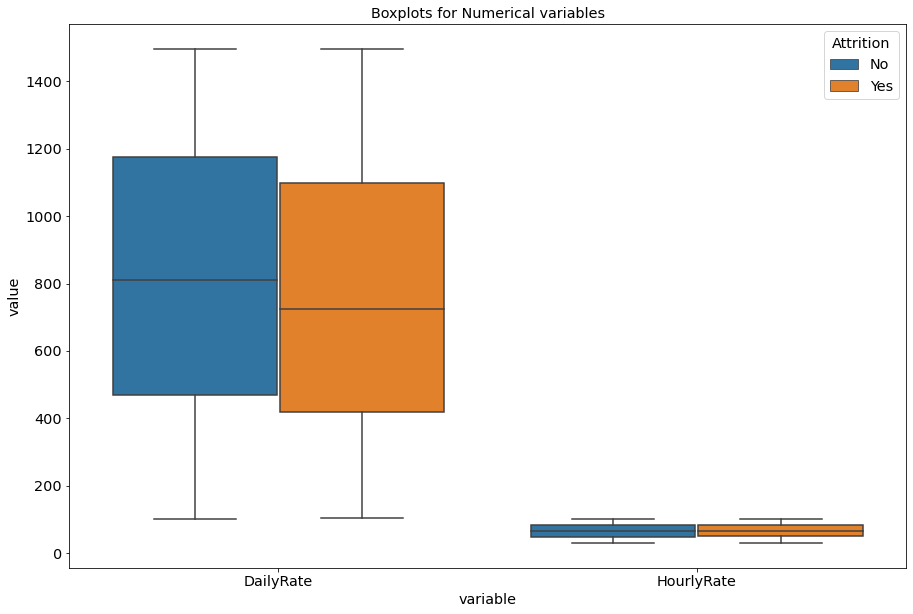

In [ ]:
NewNumeric=Train[['DailyRate','HourlyRate']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
plt.show()

**Observation**

1. Hourly rate is not contributing much to decide attrition factor
2. Althought DailyRate is also not contributing much, the average dailyrate value is less for employees who are contributing to attrition

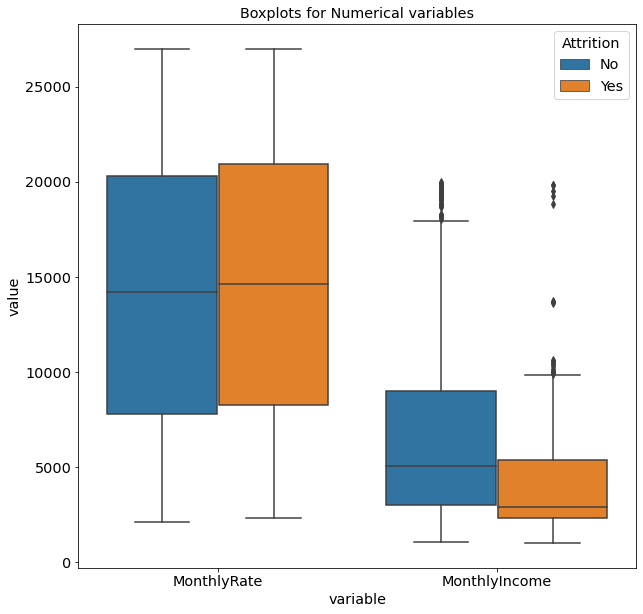

In [ ]:
NewNumeric=Train[['MonthlyRate','MonthlyIncome']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(10,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
plt.show()

**Observation:**

MonthlyRate is not useful to decide the attrition. However, the average income of employees who are contributing to attrition rate is very low 

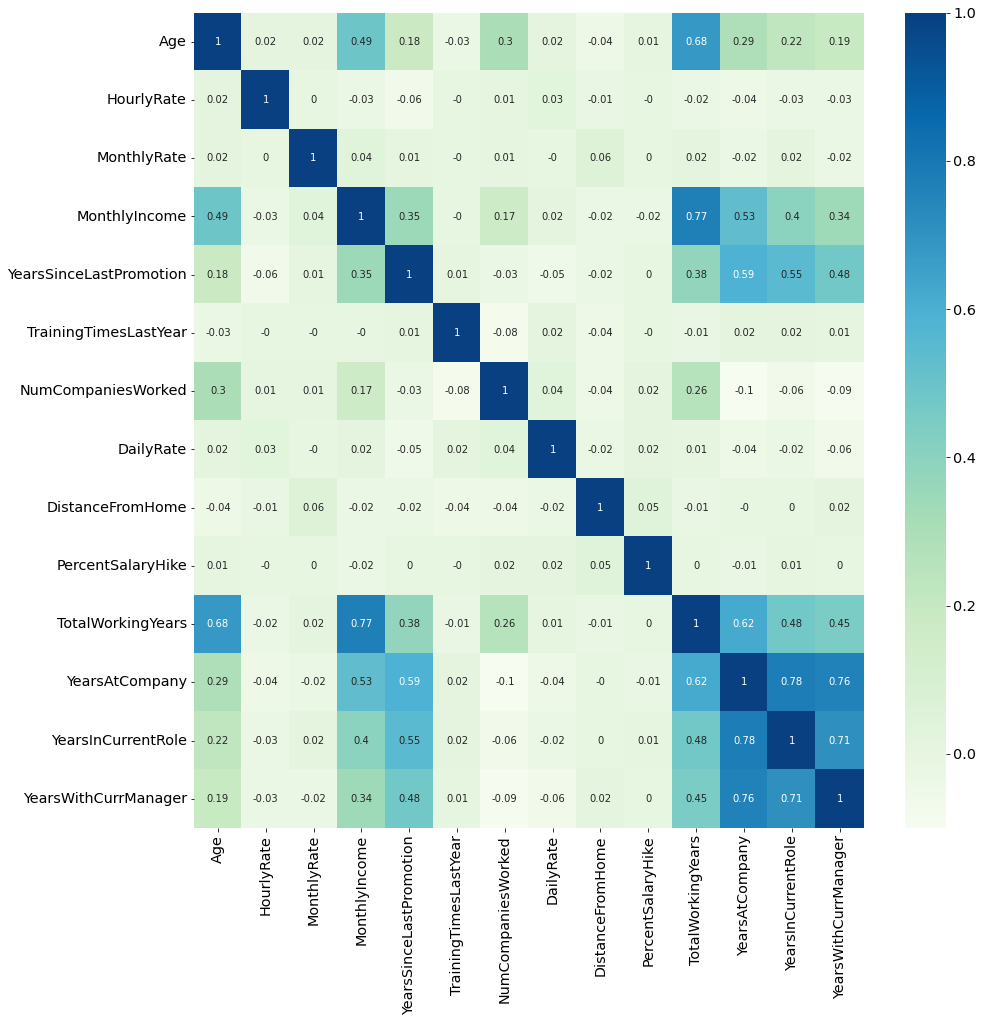

In [ ]:
#Bivariate Analysis Correlation plot with the final Numeric variables
NewNumeric=Train[['Age','HourlyRate','MonthlyRate','MonthlyIncome','YearsSinceLastPromotion',
                  'TrainingTimesLastYear','NumCompaniesWorked','DailyRate','DistanceFromHome',
                  'PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
                  'YearsWithCurrManager']]
plt.figure(figsize=(15,15))
sns.heatmap(round(NewNumeric.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

**Observations:**

**Inferences from Correlation plot**
1. By analysising the below correlations between variables, we can infer that:

1. As age increases the workingYears(experience) increases.
2. Monthly Income is directly proportional to Job level. Employees at Higher position gets more income.
3. As the TotalWorkingYears increases, employee gets promoted to higher job level, resulting in higher income earn
4. Monthly Income is high for employees who have more TotalWorking Experience
5. PercentSalaryHike is directly Proportional on the Rating. Higher the rating, more the Salary
6. TotalWorkingYears-YearsAtCompany shows that people who have more experience might be liking to continue their association with the company
7. YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole shows a positive correlation among each other.

**Correlated variables and their correlations:**

1. Age- Total Working Years-0.65
2. Job level-Monthly Income-0.95
3. Joblevel-TotalWorkingYears-0.79
4. MonthlyIncome-TotalWorkingYears-0.77
5. PercentSalaryHike-PerformanceRating-0.77
6. TotalWorkingYears-YearsAtCompany-0.62
7. YearsAtCompany-YearsInCurrentRole-0.78
8. YearsAtCompany-YearsWithCurrManager-0.76
9. YearsInCurrentRole-YearsWithCurrManager-0.71



In [ ]:
#Attrition vs Numeric Variables
#Creating variable for holding the Numeric data into a DataFrame
NumericVariables=Train[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                        'MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                        'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','NumCompaniesWorked',
                        'YearsSinceLastPromotion','YearsWithCurrManager']]

In [ ]:
#Creating NumericBV variable for concatanating with Attrition Column for Bivariate Analysis
NumericBV=NumericVariables
NumericBV['Attrition']=Train['Attrition']

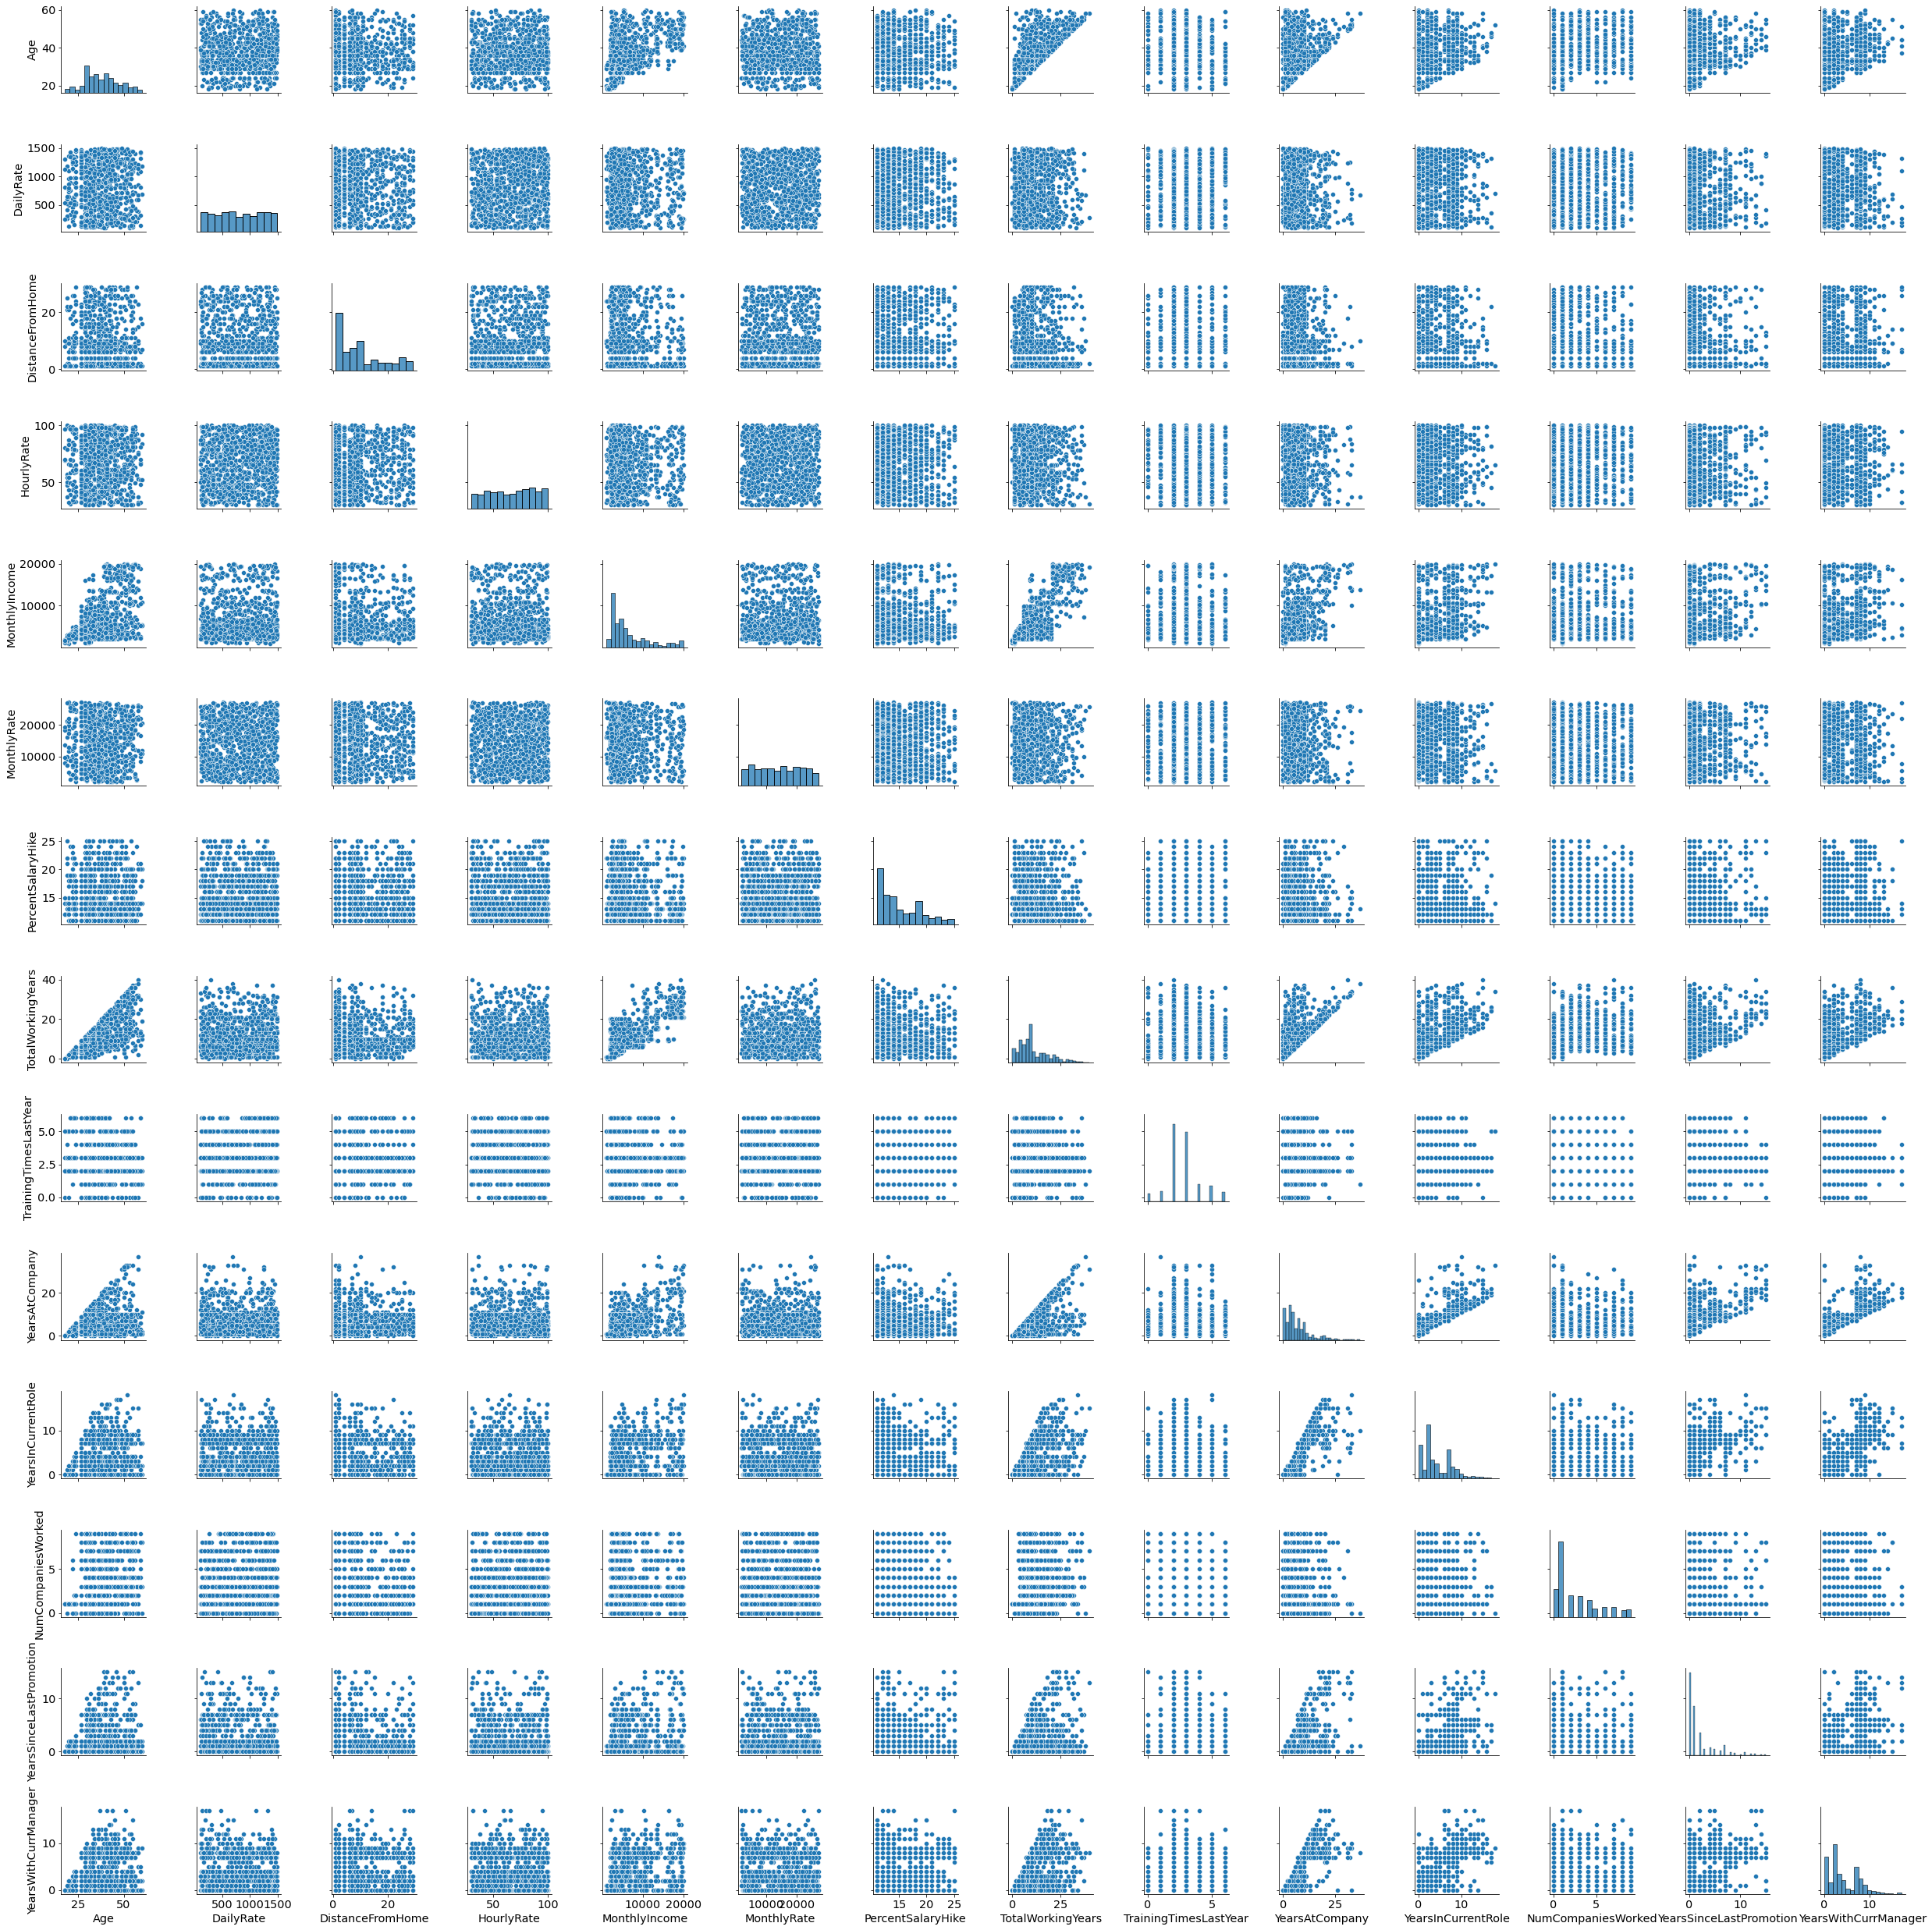

In [ ]:
#Bivariate Analysis for finding relationship between continous variables
#DONOT RUN AS IT TAKES TIME AND DONOT DELETE THE CELL
sns.pairplot(NumericBV)

**Observation:**

We got the same variables correlations inferences as got from the correlation plot

# **Overall inferences of Numeric Bivariate Analysis with Attrition:**

We see below columns are playing major role in deciding the attrition of Employees

1. Age
2. MonthlyIncome
3. TotalWorkingYears
4. YearsAtCompany
5. NumCompaniesWorked
6. YearsInCurrentRole
7. YearsWithCurrManager

**Inferences from Correlation plot**
1. By analysising the below correlations between variables, we can infer that:

1. As age increases the workingYears(experience) increases.
2. Monthly Income is directly proportional to Job level. Employees at Higher position gets more income.
3. As the TotalWorkingYears increases, employee gets promoted to higher job level, resulting in higher income earn
4. Monthly Income is high for employees who have more TotalWorking Experience
5. PercentSalaryHike is directly Proportional on the Rating. Higher the rating, more the Salary
6. TotalWorkingYears-YearsAtCompany shows that people who have more experience might be liking to continue their association with the company
7. YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole shows a positive correlation among each other.

# **Categorical Univariate and Bivariate Analysis:**

In [ ]:
#Separating Categorical data and checking the column names
CategoricalData=Train.select_dtypes(include=['object'])
rows,col=(CategoricalData.shape)
print("Number of Category columns are:",col)
print(CategoricalData.columns)

Number of Category columns are: 8
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [ ]:
#melting the dataframe to bring the data into single column
CategoricalDataMelt=CategoricalData.melt()

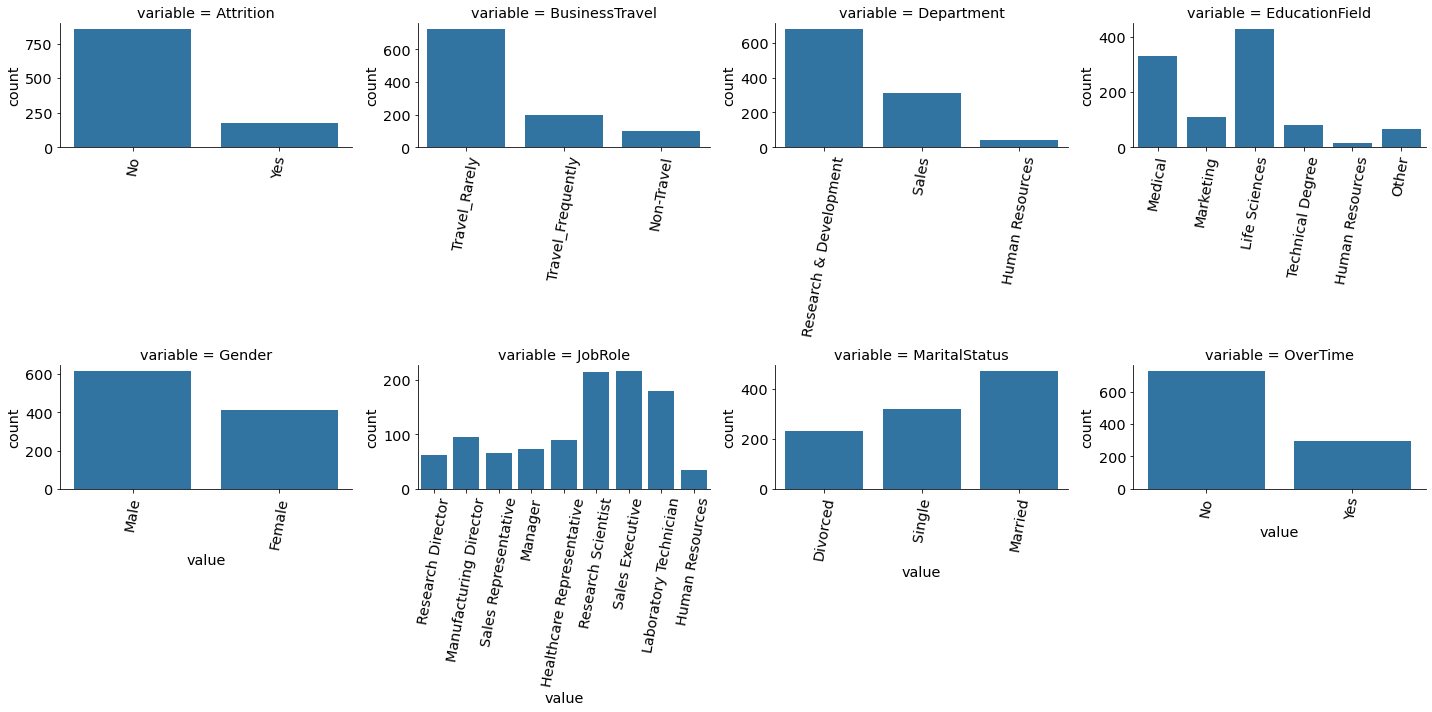

In [ ]:
#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(CategoricalDataMelt, col='variable',sharex=False, 
                             dropna=True, sharey=False, size=5,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=80)
countPlot=CatFacetGrid.map(sns.countplot,'value')
countPlot.fig.tight_layout()

**Observation:**

From the above plot, below are the proportion of employees who belongs to larger group
1. Attrition : No
2. Business_Travel: Rarely
3. Department: Research and Development
4. Educational field: LifeSciences
5. Gender: Male
6.  JobRole: Sales Executives and Research Scientists share equal proportion
7. MaritalStatus: Married
8. OverTime: No

In [ ]:
# Subsetting the categorical variables on numeric type
ConvertedCat=Train[['Education','EnvironmentSatisfaction','Attrition','StockOptionLevel' ,'JobInvolvement','JobLevel', 'JobSatisfaction',  'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']]

#Naming the levels of the variables
cleanup_nums = {"Education": {1: "Below College", 2: "College", 3:"Bachelor", 4:"Master", 5:"Doctor"},
                "EnvironmentSatisfaction": {1:"Low", 2: "Medium", 3:"High", 4: "Very High"},
                "JobInvolvement":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},
                "JobSatisfaction":{1:"Low", 2:"Medium", 3:"High",4: "Very High"},
                "PerformanceRating":{1:"Low", 2:"Good", 3:"Excellent", 4:"Outstanding"},
                "RelationshipSatisfaction":{1: "Low",2:"Medium", 3:"High",4:"Very High"},
                "WorkLifeBalance":{1:"Bad",2:"Good",3:"Better",4:"Best"}
                }   
#Mapping the values                
ConvertedCat.replace(cleanup_nums, inplace=True)

#melting the dataframe to bring the data into single column
ConvertedCatDataMelt=ConvertedCat.melt()

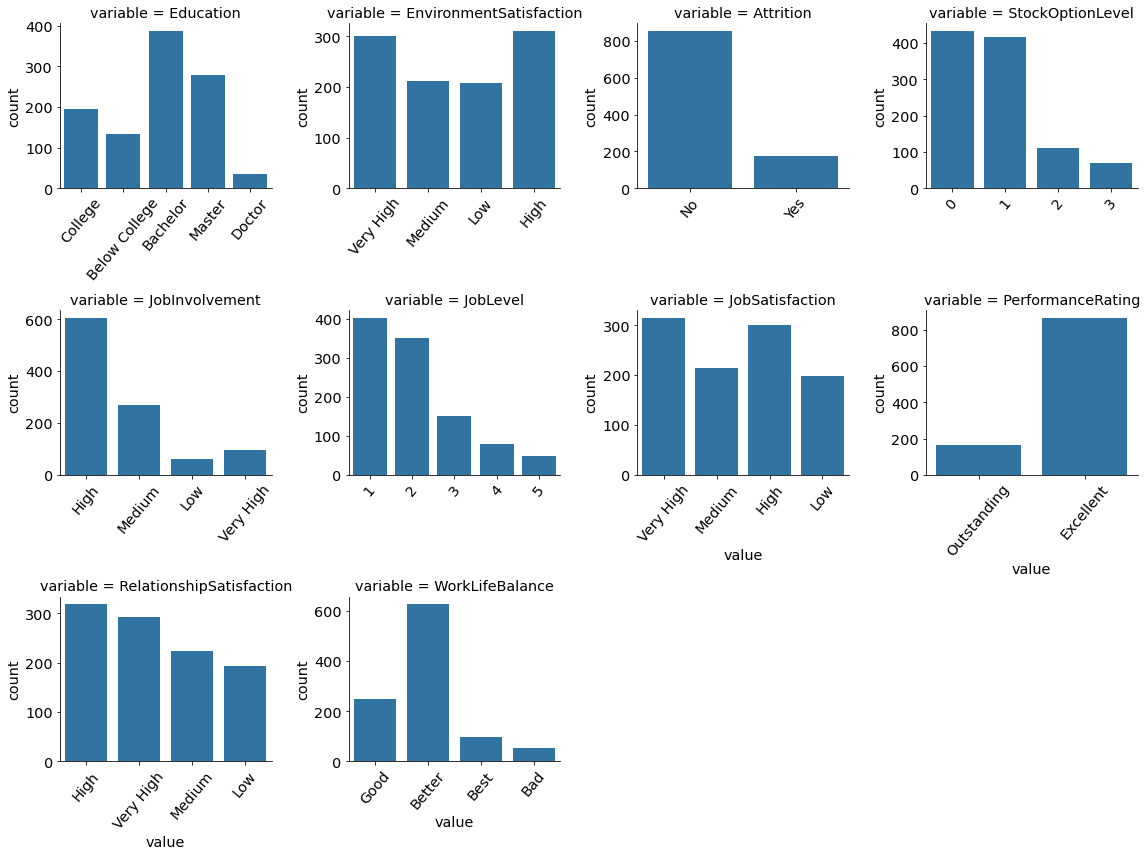

In [ ]:
#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=50)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

**Observation:**

From the above plot, below are the proportion of employees who belongs to larger group
1. Education : Bachelor
2. Environment Satisfaction: High and Very High
3. JobInvolvement: High
4. Job Satisfaction: High
5. PerformanceRating: Excellent
6. RelationshipSatisfaction: High
7. WorkLifeBalance: Better


No handles with labels found to put in legend.


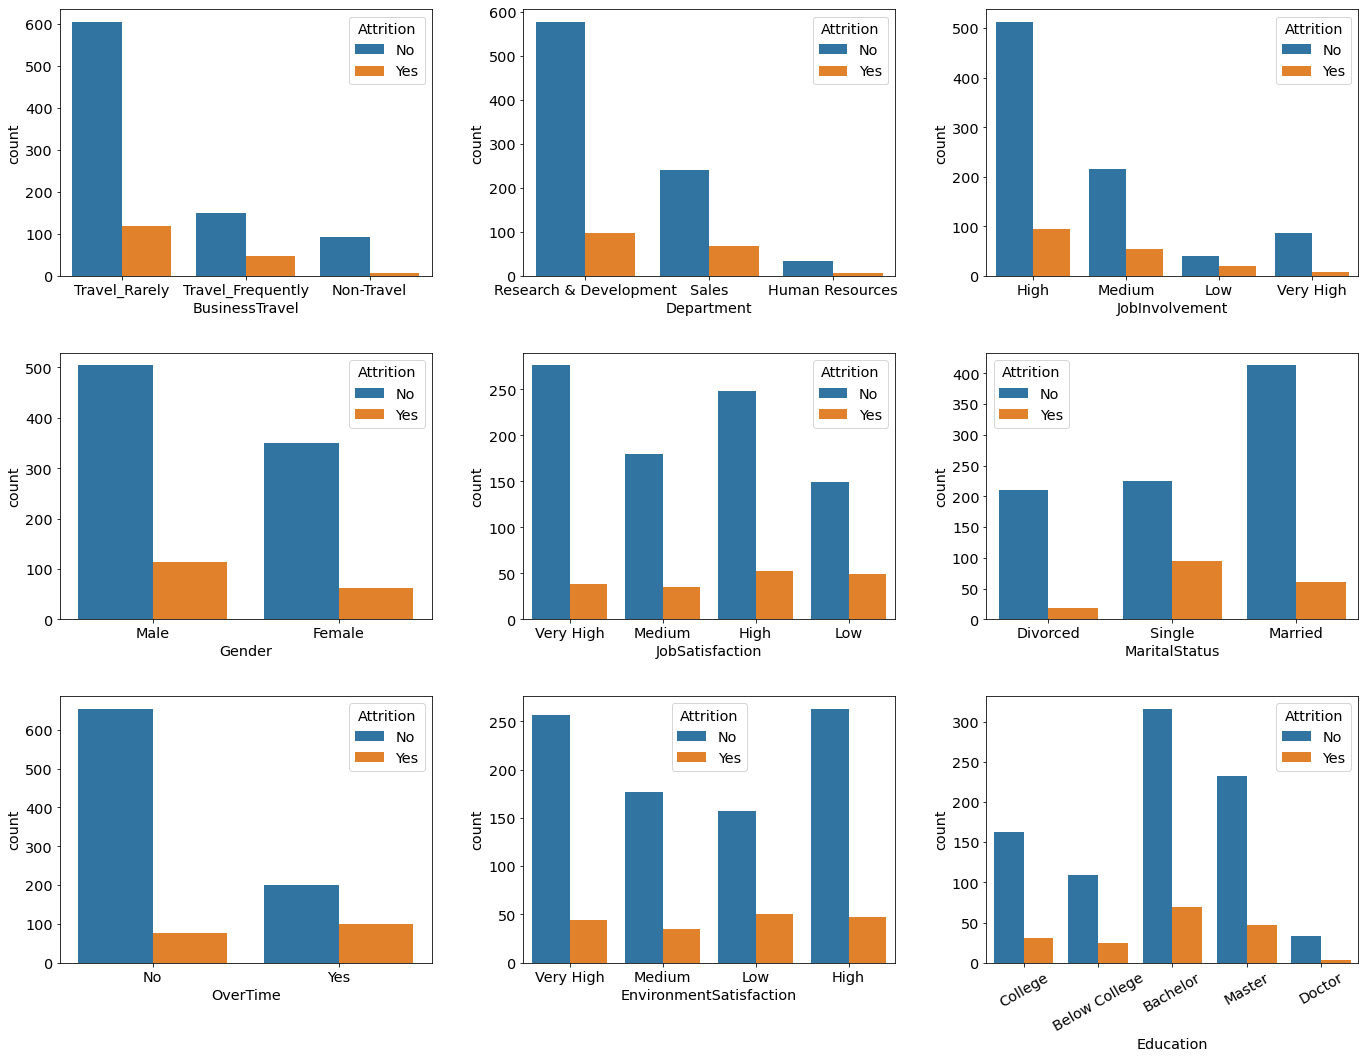

In [ ]:
#Bivariate Analysis of categorical variables with Attrition

#initialising plts
fig, axes = plt.subplots(nrows=3,ncols=3)

#Setting the size of the plot
fig.set_size_inches(20, 15)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})

#plotting the Bivariate analysis plots
a = sns.countplot(data=CategoricalData,x='BusinessTravel' ,
                orient = "v" , ax=axes[0][0],hue='Attrition')
b = sns.countplot(data=CategoricalData,x='Department' ,
                orient = "v" , ax=axes[0][1],hue='Attrition')
c = sns.countplot(data=ConvertedCat,x='JobInvolvement',
                orient = "v" , ax=axes[0][2],hue='Attrition')
d = sns.countplot(data=CategoricalData,x='Gender',
                orient = "v" , ax=axes[1][0],hue='Attrition')
e = sns.countplot(data=ConvertedCat,x='JobSatisfaction',
                orient = "v" , ax=axes[1][1],hue='Attrition')
f = sns.countplot(data=CategoricalData,x='MaritalStatus',
                orient = "v" , ax=axes[1][2],hue='Attrition')
g = sns.countplot(data=CategoricalData,x='OverTime',
                orient = "v" , ax=axes[2][0],hue='Attrition')
h = sns.countplot(data=ConvertedCat,x='EnvironmentSatisfaction',
                orient = "v" , ax=axes[2][1],hue='Attrition')
i = sns.countplot(data=ConvertedCat,x='Education',
                orient = "v" , ax=axes[2][2],hue='Attrition')
plt.xticks(rotation=30)
plt.show()

**Observation:**

Below are the columns which contribute to Attrition

1. Job Satisfaction-Low, High
2. MaritalStatus-Single
3. OverTime-Yes
4. EnvironmentSatisfaction-Low, High

No handles with labels found to put in legend.


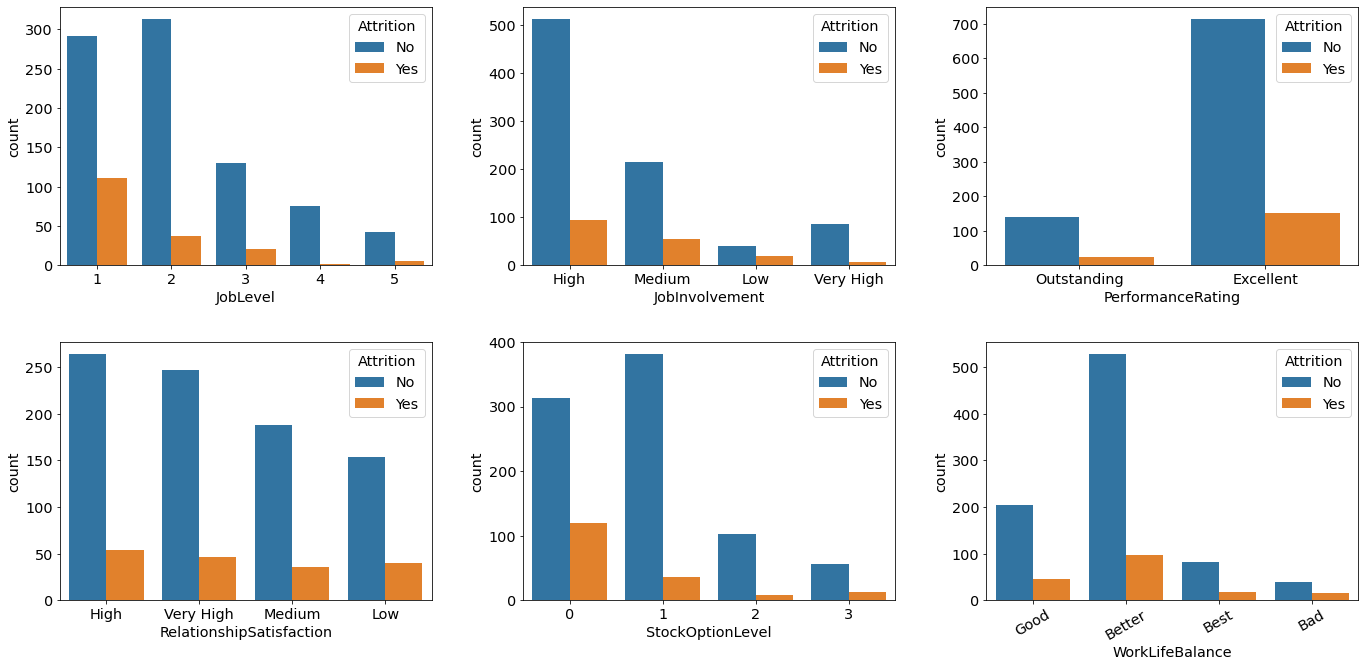

In [ ]:
#Bivariate Analysis of categorical variables with Attrition

#initialising plts
fig, axes = plt.subplots(nrows=2,ncols=3)

#Setting the size of the plot
fig.set_size_inches(20, 10)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})

b = sns.countplot(data=ConvertedCat,x='JobLevel',
                orient = "v" , ax=axes[0][0],hue='Attrition')
c = sns.countplot(data=ConvertedCat,x='JobInvolvement',
                orient = "v" , ax=axes[0][1],hue='Attrition')
e = sns.countplot(data=ConvertedCat,x='PerformanceRating',
                orient = "v" , ax=axes[0][2],hue='Attrition')
f = sns.countplot(data=ConvertedCat,x='RelationshipSatisfaction',
                orient = "v" , ax=axes[1][0],hue='Attrition')
g = sns.countplot(data=ConvertedCat,x='StockOptionLevel',
                orient = "v" , ax=axes[1][1],hue='Attrition')
h = sns.countplot(data=ConvertedCat,x='WorkLifeBalance',
                orient = "v" , ax=axes[1][2],hue='Attrition')
plt.xticks(rotation=30)
plt.show()

**Observation:**

Below are the columns contributing to Attrition. Hence important in our analysis:

1. JobLevel-1
2. RelationShipSatisfaction-Low
3. StockOptionsLevel-0,3

No handles with labels found to put in legend.


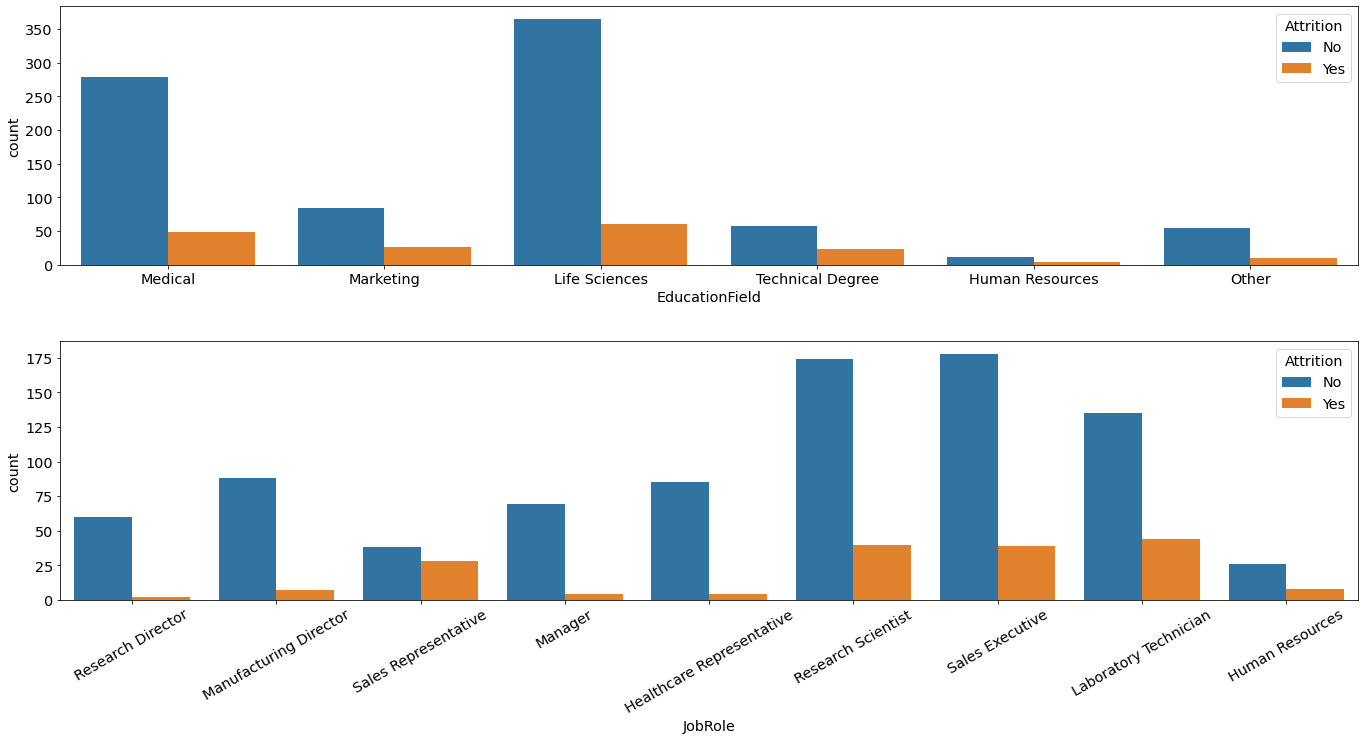

In [ ]:
#Bivariate Analysis of categorical variables with Attrition

#initialising plts
fig, axes = plt.subplots(nrows=2,ncols=1,squeeze=False)

#Setting the size of the plot
fig.set_size_inches(20, 10)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})


d = sns.countplot(data=CategoricalData,x='EducationField',
                orient = "v" , ax=axes[0][0],hue='Attrition')
plt.xticks(rotation=30)
d = sns.countplot(data=CategoricalData,x='JobRole',
                orient = "v" , ax=axes[1][0],hue='Attrition')
plt.xticks(rotation=30)
plt.show()

**Observation:**

JobRole-Labratory Technician, SalesRepresentative contributing more to attrition

# **Overall Observations from Categorical Variable Analysis:**

Below Categorical variables are important for Employee Attribution:

1. JobLevel-1
2. RelationShipSatisfaction-Low
3. StockOptionsLevel-0,3
4. JobRole-Labratory Technician, SalesRepresentative
5. Job Satisfaction-Low, High
6. MaritalStatus-Single
7. OverTime-Yes
8. EnvironmentSatisfaction-Low, High


# **Missing values imputation:**

In [ ]:
# Number of of null values in each column
data=round(Train.isnull().sum(),2)
nullValueCols=pd.DataFrame(data,columns=['Missing Values Count'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Column Name'},inplace=True)
nullValueCols[nullValueCols['Missing Values Count']!=0]

Column Name  Missing Values Count
0                Age                   136
2     BusinessTravel                     5
3          DailyRate                    27
5   DistanceFromHome                    95
15     MaritalStatus                     5

**Observation:**
Below are the nature of variables which have missing values

***Numerical Variables ***: Age (correlated to TotalWorkingYears), DailyRate  and DistanceFromHome (no correlation with any column)

***Categorical Variables: ***BusinessTravel, MaritalStatus

We shall impute the categorical variables first and move to continous variables. Before that, we have to find out the correlation between variables which can be used while imputing them. Since few categorical variables are of string type, perform LabelEncoding, so that heatmap can be plotted to find the relation

In [ ]:
#Displaying the number of occurences for each categorical variable
CatCol = Train.select_dtypes(include = "object").columns
print(CatCol)
print("\n")
for col in CatCol:
    print(Train[col].value_counts())
    print("\n")

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


No     853
Yes    176
Name: Attrition, dtype: int64


Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64


Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64


Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64


Male      617
Female    412
Name: Gender, dtype: int64


Sales Executive              217
Research Scientist           214
Laboratory Technician        179
Manufacturing Director        95
Healthcare Representative     89
Manager                       73
Sales Representative          66
Research Director             62
Human Resources               34
Name: JobRole, dtype: in

In [ ]:
#taking backup of original DataFrame
TrainData=Train.copy()

In [ ]:
TrainData.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction Gender  \
0               1.0          2        Medical                        4   Male   
1               6.0          2        Medical                        2   Male   
2               7.0          1      Marketing                        2   Male   
3               NaN          3        Medical                        1   Male   
4               7.0          4  Life Sciences                        2   Male   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...                  4                         3                 1   
1  ...                  4                         4                 2   
2  ...                  3                         2                 0   
3  ...                  3                         3                 1   
4  ...                  3                         4                 0   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                32                      1               2               5   
1                 7                      0               3               3   
2                 1                      3               3               1   
3                32                      2               3              32   
4                18                      4               3               8   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        1                    3  
1                   2                        0                    1  
2                   0                        1                    0  
3                   5                       10                    7  
4                   6                        4                    0  

[5 rows x 31 columns]

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


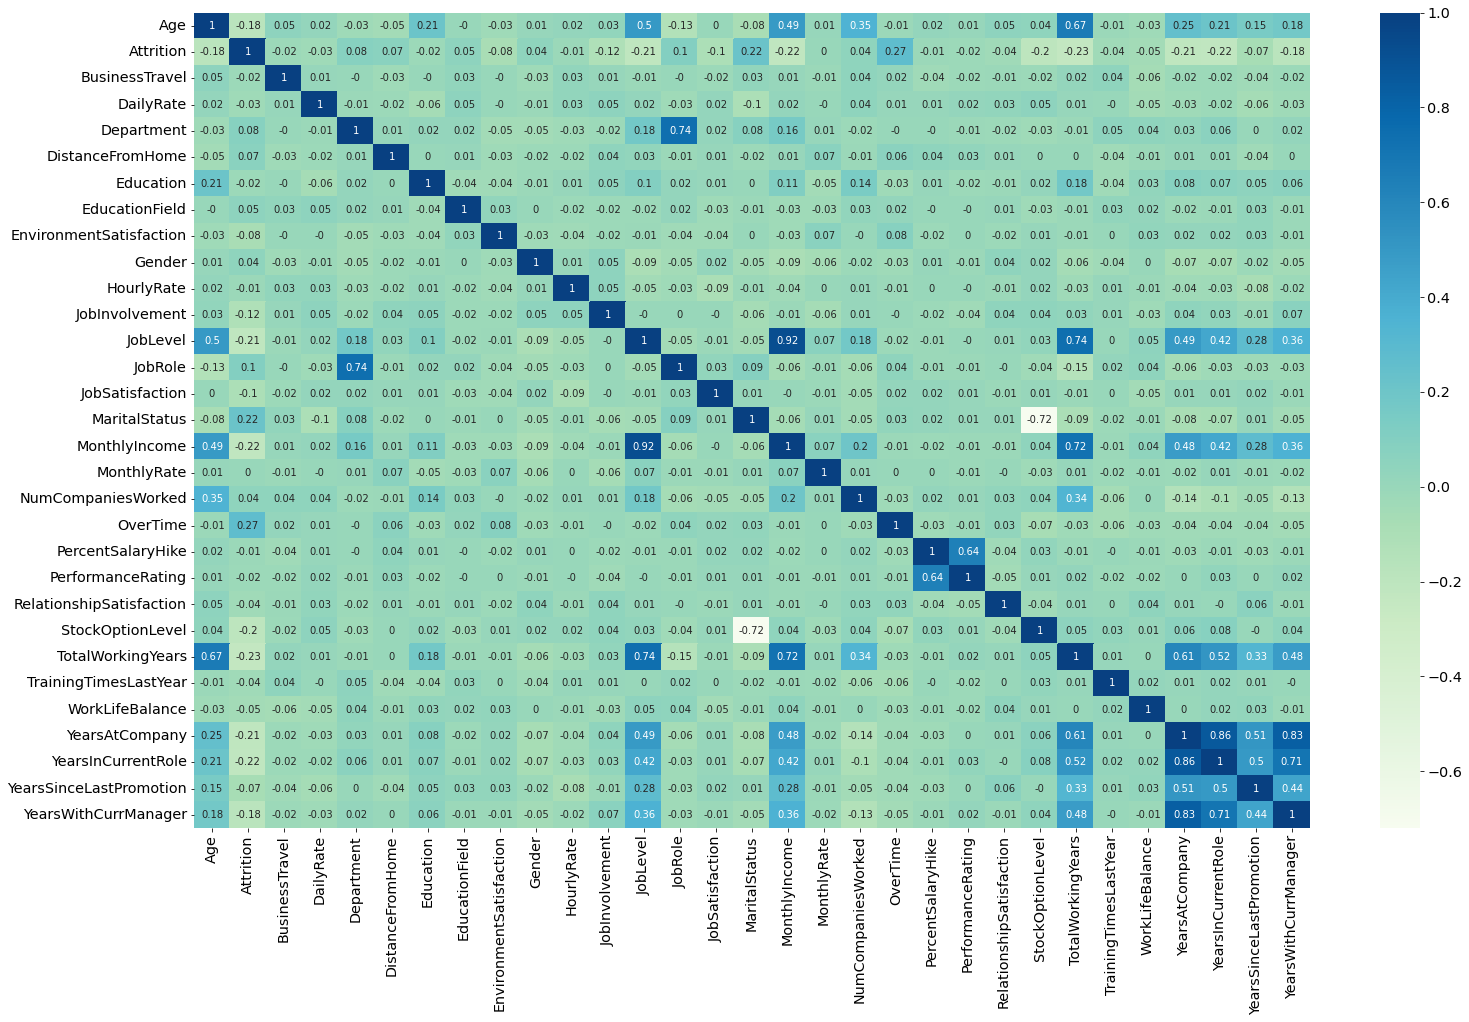

In [ ]:
#taking databackup into temp for plotting a correlation plot
temp=TrainData.copy()

#selecting only categorical variables for Label encoding
CatCol = temp.select_dtypes(include = "object").columns
print(CatCol)

#instantiating LabelEncoder() object
le = LabelEncoder()

#Label encoding the categorical columns by converting them into string type
for feat in CatCol:
    temp[feat] = le.fit_transform(temp[feat].astype(str))

#plottting correlational plot checking Correlations and dependencies for imputation
plt.figure(figsize=(25,15))
sns.heatmap(round(temp.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

***Observation:***

Also among categorical variables, we see there is strong correlation for below

department-job role
education field-department
education-job role
marital status-stock option level



We Observe the missing values are correlated as below:

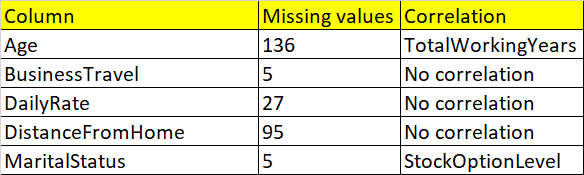

In [ ]:
#Imputing missing values in BusinessTravel.
print("Before Imputation:")
print(TrainData['BusinessTravel'].value_counts() )

#Iimputing Missing values in Marital Status using backfill method
TrainData['BusinessTravel'].fillna(method='bfill',inplace=True)

#Printing the number of missing values
print("\n")
print("Number of missing values after imputation:")
print(TrainData['BusinessTravel'].isna().sum())

print("\n")
print('After Imputation:')
print(TrainData['BusinessTravel'].value_counts() )

Before Imputation:
Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64


Number of missing values after imputation:
0


After Imputation:
Travel_Rarely        726
Travel_Frequently    200
Non-Travel           103
Name: BusinessTravel, dtype: int64


**Observation:**

We Observe that BusinessTravel field is not correlated with any column. Hence Imputing with bfill

In [ ]:
#Checking Median and mean for DailyRate
print("Before imputation:")
print("Mean for DailyRate",TrainData['DailyRate'].mean())
print("Median for DailyRate",TrainData['DailyRate'].median())

#Imputation for DailyRate
TrainData['DailyRate'].fillna(int(TrainData['DailyRate'].mean()), inplace=True)

print("\n")
print("After imputation:")
print("Mean for DailyRate",TrainData['DailyRate'].mean())
print("Median for DailyRate",TrainData['DailyRate'].median())

Before imputation:
Mean for DailyRate 800.5289421157685
Median for DailyRate 801.5


After imputation:
Mean for DailyRate 800.5150631681244
Median for DailyRate 800.0


In [ ]:
#Checking Median and mean for DistanceFromHome
print("Before imputation:")
print("Mean for DistanceFromHome",TrainData['DistanceFromHome'].mean())
print("Median for DistanceFromHome",TrainData['DistanceFromHome'].median())

#Imputation for DailyRate
TrainData['DistanceFromHome'].fillna(int(TrainData['DistanceFromHome'].mean()), inplace=True)

print("\n")
print("After imputation:")
print("Mean for DistanceFromHome",TrainData['DistanceFromHome'].mean())
print("Median for DistanceFromHome",TrainData['DistanceFromHome'].median())

Before imputation:
Mean for DistanceFromHome 9.930406852248394
Median for DistanceFromHome 8.0


After imputation:
Mean for DistanceFromHome 9.844509232264334
Median for DistanceFromHome 9.0


In [ ]:
#sorting the DF with Age and imputing missing values for Marital status since MaritalStatus is relatively dependent on Age
TrainData.sort_values(by='TotalWorkingYears',inplace=True)

#Iimputing Missing values in Marital Status using backfill method
TrainData['Age'].fillna(method='bfill',inplace=True)

#Printing the number of missing values
print("Number of missing values after imputation:\n")
print(TrainData['Age'].isna().sum())

Number of missing values after imputation:

0


In [ ]:
#cross tabulating since MaritalStatus and StockOptionLevel are highly correlated
pd.crosstab(TrainData['StockOptionLevel'],TrainData['MaritalStatus'],dropna=True)

MaritalStatus     Divorced  Married  Single
StockOptionLevel                           
0                        6      106     320
1                      133      280       0
2                       54       56       0
3                       37       32       0

**Observation:**

We noticed that MaritalStatus is highly correlated with StockOptionLevel. Hence Making a cross tabulation to check for imputation

In [ ]:
#Retriving the null values for MaritalStatus
#10,89,105,107,150
TrainData[TrainData['MaritalStatus'].isna()]

Age Attrition BusinessTravel  DailyRate              Department  \
105  29.0       Yes  Travel_Rarely      805.0  Research & Development   
89   43.0        No  Travel_Rarely     1001.0  Research & Development   
150  57.0        No  Travel_Rarely      405.0  Research & Development   
10   40.0        No  Travel_Rarely      630.0                   Sales   
107  41.0        No     Non-Travel      247.0  Research & Development   

     DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
105               1.0          2  Life Sciences                        2   
89                7.0          3  Life Sciences                        3   
150               1.0          2  Life Sciences                        2   
10                4.0          4      Marketing                        3   
107               7.0          1  Life Sciences                        2   

     Gender  ...  PerformanceRating  RelationshipSatisfaction  \
105  Female  ...                  3                         4   
89   Female  ...                  3                         1   
150    Male  ...                  4                         1   
10     Male  ...                  3                         1   
107  Female  ...                  4                         2   

     StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
105                 1                 1                      1   
89                  1                10                      1   
150                 1                13                      2   
10                  1                15                      2   
107                 2                21                      3   

    WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
105               3               1                   0   
89                2               1                   0   
150               2              12                   9   
10                2              12                  11   
107               3              21                  16   

     YearsSinceLastPromotion YearsWithCurrManager  
105                        0                    0  
89                         0                    0  
150                        2                    8  
10                         2                   11  
107                        5                   10  

[5 rows x 31 columns]

***Observation:***
The respective StockOptionLevel for null values of MaritalStatus are 1 and 2.

From Cross tabulation we noticed that


If StockOptionLevel =1 then Most of the Employees are Married

If StockOptionLevel =2 then Most of the Employees are Married


In [ ]:
TrainData['MaritalStatus'].mode()

0    Married
dtype: object

**Observation:**

The most frequent occuring value is also married hence we can replace the null values with Mode

In [ ]:
#Imputing Marital status column with mode 
TrainData['MaritalStatus'].fillna(TrainData['MaritalStatus'].mode()[0], inplace=True)

**Observation:**

MaritalStatus is imputed as 'Married' as per the analysis

In [ ]:
# Checking Presence of null values after imputation is done
data=round(TrainData.isnull().sum(),2)
data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

All the missing values are imputed. There are no missing values anymore

# **Dimensionality Reduction**

# ***Feature Engineering/ Feature Selection:***

We have already dropped EmployeeCount','Over18','StandardHours','EmployeeNumber' variables during EDA as they dont convey any information.

Department and JobRole are highly collineary. Hence we will try to retain one column and drop the other by doing feature engineering

In [ ]:
TrainDataImputed=TrainData.copy()

In [ ]:
#checking how many unique values are there in Department
deps=TrainData['Department'].unique()
deps

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [ ]:
#Displaying values in each department
deps=TrainData['Department'].unique()
deps

for i in deps:  
  print("Department Name:",[i])
  values=TrainData.loc[TrainData['Department'] == i]['JobRole'].unique()
  print("Values are:",values)
  print("\n")

Department Name: ['Research & Development']
Values are: ['Laboratory Technician' 'Research Scientist' 'Manufacturing Director'
 'Healthcare Representative' 'Research Director' 'Manager']


Department Name: ['Sales']
Values are: ['Sales Representative' 'Sales Executive' 'Manager']


Department Name: ['Human Resources']
Values are: ['Human Resources' 'Manager']




Manager is the common role in all the departments. Hence renaming Manager with respective Departments and Department column can be dropped

In [ ]:
#modifying the Manager role which is commong in all departments
TrainData.loc[(TrainData['Department']=='Research & Development') & (TrainData['JobRole']=='Manager'),'JobRole']='Research & Development_Manager'
TrainData.loc[(TrainData['Department']=='Sales') & (TrainData['JobRole']=='Manager'),'JobRole']='Sales_Manager'
TrainData.loc[(TrainData['Department']=='Human Resources') & (TrainData['JobRole']=='Manager'),'JobRole']='Human Resources_Manager'

In [ ]:
#displaying after update
deps=TrainData['Department'].unique()
deps

for i in deps:  
  print("Department Name:",[i])
  values=TrainData.loc[TrainData['Department'] == i]['JobRole'].unique()
  print("Values are:",values)
  print("\n")

#droping deparment field
TrainData.drop('Department',axis=1,inplace=True)

Department Name: ['Research & Development']
Values are: ['Laboratory Technician' 'Research Scientist' 'Manufacturing Director'
 'Healthcare Representative' 'Research Director'
 'Research & Development_Manager']


Department Name: ['Sales']
Values are: ['Sales Representative' 'Sales Executive' 'Sales_Manager']


Department Name: ['Human Resources']
Values are: ['Human Resources' 'Human Resources_Manager']




Department column is dropped. Jobrole column is sufficient now

In [ ]:
TrainData.drop(['HourlyRate','MonthlyRate','TrainingTimesLastYear','PercentSalaryHike','YearsAtCompany','JobLevel'],axis=1,inplace=True)

From Bivariate analysis, we see there is no/least dependency of these variables on Attrition rate. Hence dropping these variables 

'HourlyRate','MonthlyRate','TrainingTimesLastYear','PercentSalaryHike','YearsAtCompany','JobLevel'

In [ ]:
#selecting only categorical variables for Label encoding
CatCol = TrainData.select_dtypes(include = "object").columns
print(CatCol)
#instantiating LabelEncoder() object
le = LabelEncoder()

#Label encoding the categorical columns by converting them into string type
for feat in CatCol:
    TrainData[feat] = le.fit_transform(TrainData[feat].astype(str))

Index(['Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [ ]:
#combining MaritalStatus and StockOptionLevel into one column
scaler = StandardScaler()
X_train_new = scaler.fit_transform(TrainData[['MaritalStatus','StockOptionLevel']])
pca = PCA(n_components=1)
data_transformed = pca.fit_transform(X_train_new)
print("Explained Variance Ratio:",pca.explained_variance_ratio_)
data_transformed = pd.DataFrame(data_transformed, columns = ['Marital_stock'])
TrainData=pd.concat([TrainData,data_transformed],axis=1)

Explained Variance Ratio: [0.82620134]


MaritalStatus and StockOptionLevel are correlated (0.7). 82% of variacne will be explained by the new column. Hence transforming it into a single column 'Marital_stock'


In [ ]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(TrainData[['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager']])
pca = PCA(n_components=5)
data_transformed = pca.fit_transform(X_train_new)
print("Explained Variance Ratio:",pca.explained_variance_ratio_)
print("Components:",pca.components_)
varianceRatio=pca.explained_variance_ratio_

Explained Variance Ratio: [0.58374237 0.22552022 0.09831427 0.05837631 0.03404683]
Components: [[ 0.52807328  0.39510878  0.47206662  0.4243337   0.40264336]
 [ 0.24712914  0.50418289  0.2689925  -0.52961711 -0.57608641]
 [-0.11146917  0.69872416 -0.67822233  0.06461014  0.18761443]
 [ 0.08406705 -0.06106109  0.0398825  -0.73098008  0.67326205]
 [ 0.80035814 -0.31264159 -0.49317339 -0.03066389 -0.13236999]]


80% of variance is explained by frist 2 components.

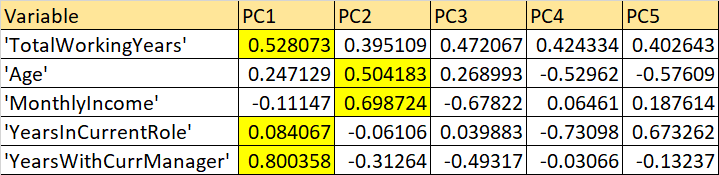

In [ ]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(TrainData[['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager']])
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(X_train_new)
data_transformed = pd.DataFrame(data_transformed, columns = ['Age&CompanyExp','ExperienceVsIncome'])
TrainData=pd.concat([TrainData,data_transformed],axis=1)

2 columns Age&CompanyExp','ExperienceVsIncome' are added here.

In [ ]:
TrainData.drop(['MaritalStatus','StockOptionLevel'],axis=1,inplace=True)
TrainData.drop(['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

Dropping the duplicate columns after transformation

In [ ]:
print(TrainData.shape)
TrainData.columns

(1029, 20)


Index(['Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'Marital_stock',
       'Age&CompanyExp', 'ExperienceVsIncome'],
      dtype='object')

In [ ]:
#Taking backup of imputed dataset
TrainDataImputed=TrainData.copy()

In [ ]:
#check the data after label encoding
TrainData.sort_index().head()

Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0          0               2     1126.0               1.0          2   
1          0               2      216.0               6.0          2   
2          1               2      337.0               7.0          1   
3          0               1     1246.0               9.0          3   
4          0               2      994.0               7.0          4   

   EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  JobRole  \
0               3                        4       1               3        6   
1               3                        2       1               3        4   
2               2                        2       1               3        9   
3               3                        1       1               3        2   
4               1                        2       1               3        0   

   JobSatisfaction  NumCompaniesWorked  OverTime  PerformanceRating  \
0                4                   9         0                  4   
1                2                   6         0                  4   
2                2                   1         0                  3   
3                2                   1         0                  3   
4                2                   7         0                  3   

   RelationshipSatisfaction  WorkLifeBalance  YearsSinceLastPromotion  \
0                         3                2                        1   
1                         4                3                        0   
2                         2                3                        1   
3                         3                3                       10   
4                         4                3                        4   

   Marital_stock  Age&CompanyExp  ExperienceVsIncome  
0      -1.553963        2.877640            2.154511  
1      -1.553963       -1.089293            0.522418  
2      -1.553963       -2.702671           -0.157624  
3      -1.553963        3.530020            1.400158  
4      -1.553963        1.225709            1.633854

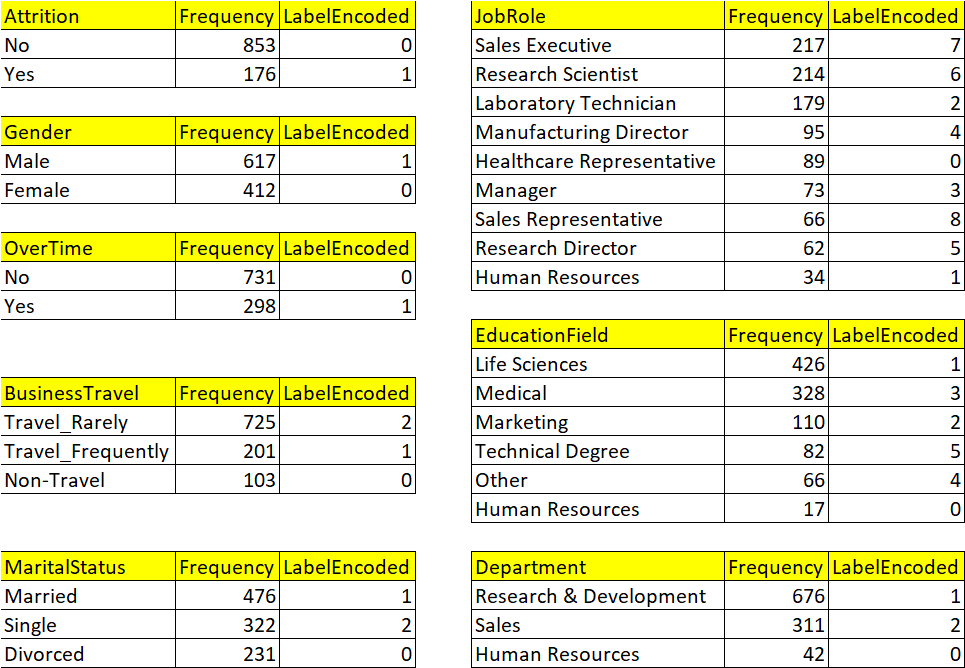

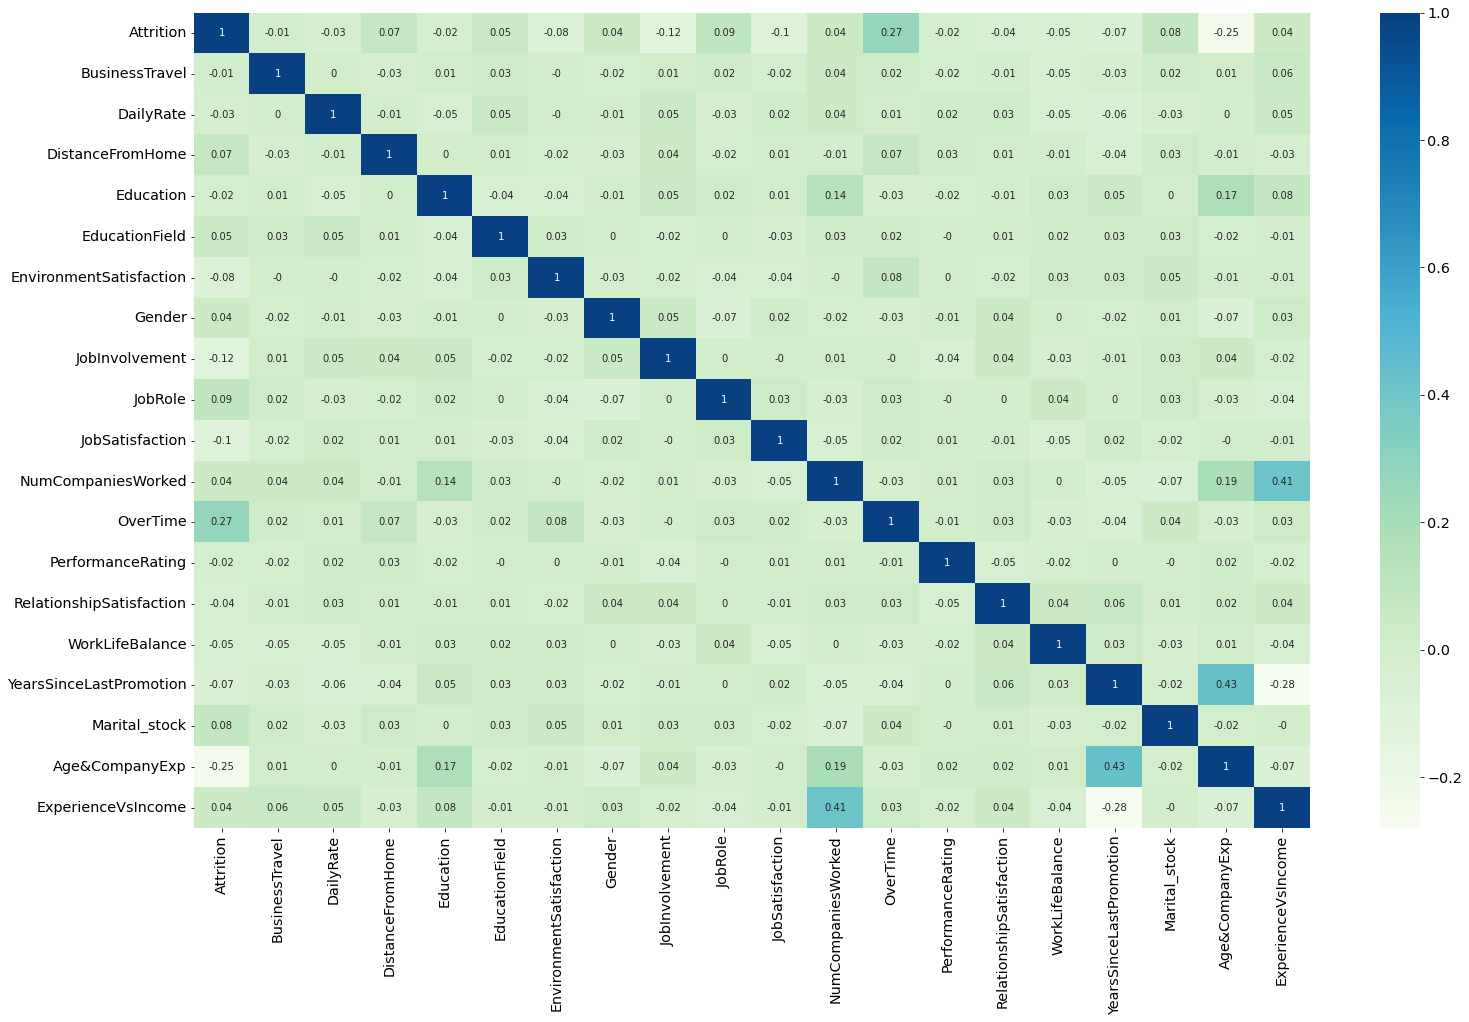

In [ ]:
#plottting correlational plot checking Correlations and dependencies for imputation
plt.figure(figsize=(25,15))
sns.heatmap(round(TrainData.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

# **Splitting Data**

In [ ]:
#dropping target column from input
X=TrainData.drop(columns=['Attrition'])
y=TrainData['Attrition']

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

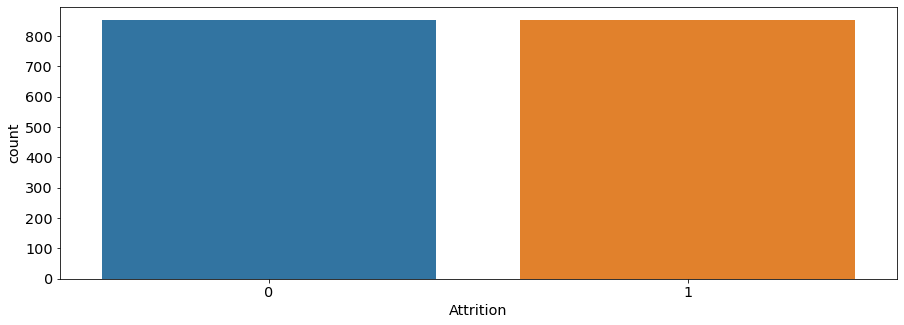

In [ ]:
sns.countplot(data=TrainData, x = y_up)

In [ ]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(y_up.value_counts())

Before Resampling :
0    853
1    176
Name: Attrition, dtype: int64
After Resampling :
0    853
1    853
Name: Attrition, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.25, random_state=2)

In [ ]:
# checking the spread of overall split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)

Independent variables Train dataset shape (1279, 19)
Target dataset shape Train (1279,)
Independent variables Test dataset shape (427, 19)
Test dataset shape Train (427,)


In [ ]:
#checking the split wrt to attrition
print("Attrtion from TrainDataset\n",y_train.value_counts())
print("\n")
print("Attrtion from TestDataSet\n",y_test.value_counts())

Attrtion from TrainDataset
 1    641
0    638
Name: Attrition, dtype: int64


Attrtion from TestDataSet
 0    215
1    212
Name: Attrition, dtype: int64


In [ ]:
print("Train data Split proportion:\n")
print(round(y_train[y_train==1].value_counts()/y_train.shape[0],2))
print(round(y_train[y_train==0].value_counts()/y_train.shape[0],2))
print("\n")
print("Test data Split proportion:\n")
print(round(y_test[y_test==1].value_counts()/y_test.shape[0],2))
print(round(y_test[y_test==0].value_counts()/y_test.shape[0],2))

Train data Split proportion:

1    0.5
Name: Attrition, dtype: float64
0    0.5
Name: Attrition, dtype: float64


Test data Split proportion:

1    0.5
Name: Attrition, dtype: float64
0    0.5
Name: Attrition, dtype: float64


**Downsampling**

In [ ]:
TrainData["Attrition"].value_counts()

0    853
1    176
Name: Attrition, dtype: int64

In [ ]:
attrited=TrainData[TrainData["Attrition"]==1] #getting the attrited employees
not_attrited=TrainData[TrainData["Attrition"]==0] #getting not attrited employees
not_attrited=not_attrited.sample(176) 
downsample=pd.concat([attrited, not_attrited]) #now combining both

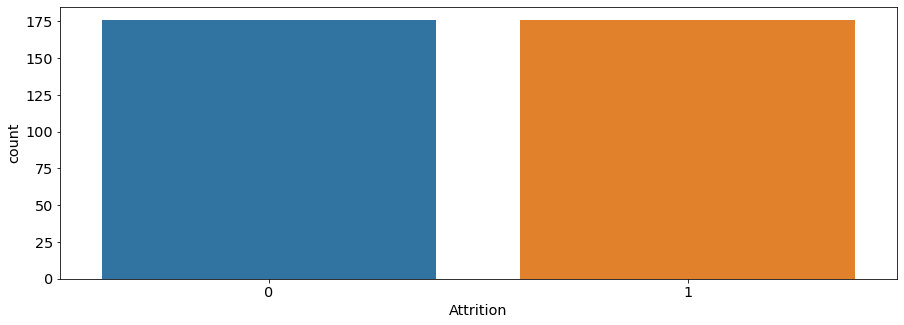

In [ ]:
sns.countplot(data= TrainData, x = downsample['Attrition'])

In [ ]:
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(
    downsample.drop(columns=['Attrition']), downsample['Attrition'], test_size=0.25, random_state=2)

# **Building Model**

# **Logistic Regression:**

In [ ]:
lr_mdl= LogisticRegression(solver='lbfgs',max_iter=10000)
lr_mdl1= lr_mdl.fit(X_train , y_train)
lr_mdl1

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_lr_mdl1 = lr_mdl1.predict(X_test) 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       215
           1       0.80      0.82      0.81       212

    accuracy                           0.81       427
   macro avg       0.81      0.81      0.81       427
weighted avg       0.81      0.81      0.81       427



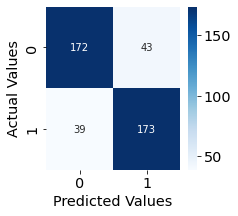

In [ ]:
cr_mdl1 = classification_report(y_test, y_pred_lr_mdl1)
print(cr_mdl1)

cm_mdl1 = confusion_matrix(y_test, y_pred_lr_mdl1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl1, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
lr_mdl1_ds= lr_mdl.fit(X_train_ds , y_train_ds)
y_pred_lr_mdl1_ds = lr_mdl1_ds.predict(X_test_ds) 

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.79      0.66      0.72        47

    accuracy                           0.73        88
   macro avg       0.73      0.73      0.73        88
weighted avg       0.74      0.73      0.73        88



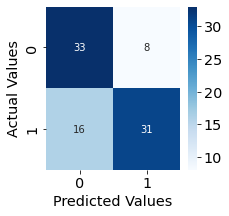

In [ ]:
cr_mdl1_ds = classification_report(y_test_ds, y_pred_lr_mdl1_ds)
print(cr_mdl1_ds)

cm_mdl1_ds = confusion_matrix(y_test_ds, y_pred_lr_mdl1_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl1_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Random Forest Classifier**

In [ ]:
rf_mdl= RandomForestClassifier(max_depth=10000)
rf_mdl2= rf_mdl.fit(X_train , y_train)

y_pred_rf_mdl2 = rf_mdl2.predict(X_test) 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       215
           1       0.88      0.86      0.87       212

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



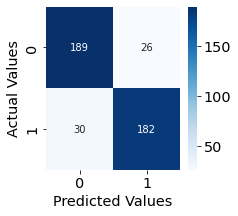

In [ ]:
cr_rf_mdl2 = classification_report(y_test, y_pred_rf_mdl2)
print(cr_rf_mdl2)

cm_mdl2 = confusion_matrix(y_test, y_pred_rf_mdl2)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl2, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

              precision    recall  f1-score   support

           0       0.56      0.76      0.65        41
           1       0.70      0.49      0.57        47

    accuracy                           0.61        88
   macro avg       0.63      0.62      0.61        88
weighted avg       0.63      0.61      0.61        88



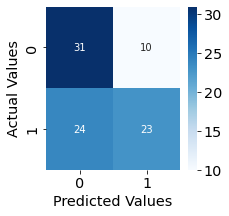

In [ ]:
rf_mdl2_ds= RandomForestClassifier(max_depth=10000).fit(X_train_ds , y_train_ds)

y_pred_rf_mdl2_ds = rf_mdl2_ds.predict(X_test_ds) 

cr_rf_mdl2_ds = classification_report(y_test_ds, y_pred_rf_mdl2_ds)
print(cr_rf_mdl2_ds)

cm_mdl2_ds = confusion_matrix(y_test_ds, y_pred_rf_mdl2_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl2_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Decision Tree Classifier**

In [ ]:
dt_mdl= DecisionTreeClassifier(class_weight='balanced',max_depth=10000)
dt_mdl3= dt_mdl.fit(X_train , y_train)

y_pred_dt_mdl3 = dt_mdl3.predict(X_test) 


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       215
           1       0.76      0.76      0.76       212

    accuracy                           0.76       427
   macro avg       0.76      0.76      0.76       427
weighted avg       0.76      0.76      0.76       427



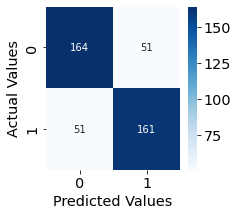

In [ ]:
cr_dt_mdl3 = classification_report(y_test, y_pred_dt_mdl3)
print(cr_dt_mdl3)

cm_mdl3 = confusion_matrix(y_test, y_pred_dt_mdl3)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl3, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
dt_mdl3_ds= dt_mdl.fit(X_train_ds , y_train_ds)

y_pred_dt_mdl3_ds = dt_mdl3_ds.predict(X_test_ds) 

              precision    recall  f1-score   support

           0       0.49      0.59      0.53        41
           1       0.56      0.47      0.51        47

    accuracy                           0.52        88
   macro avg       0.53      0.53      0.52        88
weighted avg       0.53      0.52      0.52        88



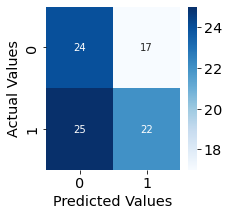

In [ ]:
cr_dt_mdl3_ds = classification_report(y_test_ds, y_pred_dt_mdl3_ds)
print(cr_dt_mdl3_ds)

cm_mdl3_ds = confusion_matrix(y_test_ds, y_pred_dt_mdl3_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl3_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**XGBoost Classifier**

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       215
           1       0.86      0.87      0.87       212

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



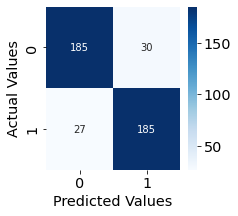

In [ ]:
xg_mdl= xgboost.XGBClassifier()
xg_mdl4= xg_mdl.fit(X_train , y_train)

y_pred_xg_mdl4 = xg_mdl4.predict(X_test) 

cr_xg_mdl4 = classification_report(y_test, y_pred_xg_mdl4)
print(cr_xg_mdl4)

cm_mdl4 = confusion_matrix(y_test, y_pred_xg_mdl4)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl4, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        41
           1       0.71      0.57      0.64        47

    accuracy                           0.65        88
   macro avg       0.66      0.65      0.65        88
weighted avg       0.66      0.65      0.65        88



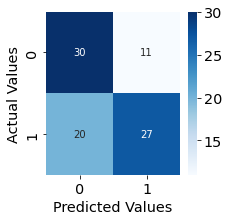

In [ ]:
xg_mdl4_ds= xg_mdl.fit(X_train_ds , y_train_ds)
y_pred_xg_mdl4_ds = xg_mdl4_ds.predict(X_test_ds) 

cr_xg_mdl4_ds = classification_report(y_test_ds, y_pred_xg_mdl4_ds)
print(cr_xg_mdl4_ds)

cm_mdl4_ds = confusion_matrix(y_test_ds, y_pred_xg_mdl4_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl4_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Naive Bayes Classifier**

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       215
           1       0.71      0.81      0.76       212

    accuracy                           0.74       427
   macro avg       0.75      0.75      0.74       427
weighted avg       0.75      0.74      0.74       427



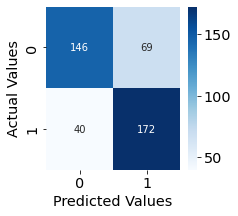

In [ ]:
nb_mdl= GaussianNB()
nb_mdl5= nb_mdl.fit(X_train , y_train)

y_pred_nb_mdl5 = nb_mdl5.predict(X_test) 

cr_nb_mdl5 = classification_report(y_test, y_pred_nb_mdl5)
print(cr_nb_mdl5)

cm_mdl5 = confusion_matrix(y_test, y_pred_nb_mdl5)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl5, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        41
           1       0.70      0.64      0.67        47

    accuracy                           0.66        88
   macro avg       0.66      0.66      0.66        88
weighted avg       0.66      0.66      0.66        88



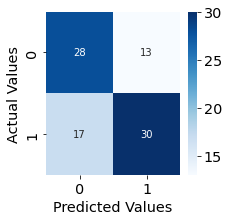

In [ ]:
nb_mdl5_ds= nb_mdl.fit(X_train_ds , y_train_ds)

y_pred_nb_mdl5_ds = nb_mdl5_ds.predict(X_test_ds) 

cr_nb_mdl5_ds = classification_report(y_test_ds, y_pred_nb_mdl5_ds)
print(cr_nb_mdl5_ds)

cm_mdl5_ds = confusion_matrix(y_test_ds, y_pred_nb_mdl5_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl5_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Support Vector Machines**

In [ ]:
from sklearn import svm

              precision    recall  f1-score   support

           0       0.89      0.42      0.57       215
           1       0.62      0.95      0.75       212

    accuracy                           0.68       427
   macro avg       0.75      0.68      0.66       427
weighted avg       0.75      0.68      0.66       427



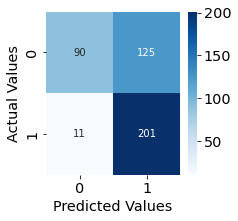

In [ ]:
svm_mdl=svm.LinearSVC()
svm_mdl6=svm_mdl.fit(X_train, y_train)

y_pred_svm_mdl6 = svm_mdl6.predict(X_test) 

cr_svm_mdl6 = classification_report(y_test, y_pred_svm_mdl6)
print(cr_svm_mdl6)

cm_mdl6 = confusion_matrix(y_test, y_pred_svm_mdl6)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl6, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

              precision    recall  f1-score   support

           0       0.49      0.85      0.62        41
           1       0.62      0.21      0.32        47

    accuracy                           0.51        88
   macro avg       0.56      0.53      0.47        88
weighted avg       0.56      0.51      0.46        88



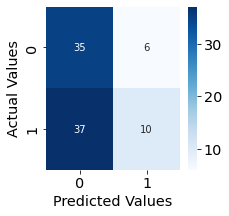

In [ ]:
svm_mdl6_ds=svm_mdl.fit(X_train_ds, y_train_ds)


y_pred_svm_mdl6_ds = svm_mdl6_ds.predict(X_test_ds) 

cr_svm_mdl6_ds = classification_report(y_test_ds, y_pred_svm_mdl6_ds)
print(cr_svm_mdl6_ds)

cm_mdl6_ds = confusion_matrix(y_test_ds, y_pred_svm_mdl6_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl6_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()